In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
from matplotlib.patches import ConnectionPatch
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import warnings


from scipy.stats import expon, reciprocal
from scipy.stats import randint
from scipy import stats

from pandas.plotting import scatter_matrix

from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering #kernel
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import FeatureAgglomeration
from sklearn.cluster import AffinityPropagation

from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

from xgboost import XGBClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression, RidgeClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler # mean0 std1
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.exceptions import ConvergenceWarning


from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline

from  warnings import simplefilter
simplefilter("ignore", category=UserWarning)

<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:300%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>Titanic Data Science</b></p>

**[Kaggle competition page here](https://www.kaggle.com/c/titanic)**

- Scikit-learnのみを使用する。TensorFlow-Kerasによるニューラルネットワークの構築は行っていない。
- ライブラリインポートに関しては、使用していない物も含まれている、特に削除していない。実際の現場ではこういった部分は非表示にすべき。
- Titanic Challenge　Top 1% Solution

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">モデリングの哲学</p>

- データサイエンティストに期待されることは、プログラムではなく知恵
- オッカムの剃刀
    - 「最も良い説明は最も単純な説明」という哲学的な原則
    - 同じくらい正確な予測ができる２つのモデル(理論)があるときは、単純なものの方が合理的で頑健なのでそちらを選ぶべきである。(Scikit-Learnでホワイトボックスモデルを使用している理由)
        - しかし単純さは絶対ではない、DNNなどは殆どが説明不能(構成上の理論は説明できるが内部は殆どがブラックボックスモデル)。
        - Scikit-Learnで実装されるようなモデルは殆どがホワイトボックスモデルである

<p style= "background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;border-style:solid;border-width:3px;border-color:#000000;"><b>データサイエンスワークフロー</b></p>

1. 問題の枠組み、全体像を把握する。
2. データを分析し個人的理解を深める
3. 機械学習アルゴリズムがデータからパターンを見つけやすくなるよう、データを準備する。
4. 異なるモデルを試し、最良の数個に絞り込む。
5. モデルを微調整し、それらをアンサンブルとして使用しソリューションにまとめる。
6. ソリューションをプレゼンする

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">DATA Observation</p>

In [2]:
main_test = pd.read_csv('test.csv')
main_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [3]:
data = pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
cluster_data_c = data.copy()
cluster_main_test = main_test.copy()

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">DATA Concatenation</p>

>事前に分割されているデータセットを結合させる。この操作を行う事によってデータ変換時に同様の変更を加える事が可能になる。
>スヌーピングバイアスはデータセットのサイズが小さいので考慮しなくても問題がない。

In [5]:
cluster_data = pd.concat([cluster_data_c, cluster_main_test], axis=0)
cluster_data.describe().T.style.bar(subset=['mean'], color='#606ff2').background_gradient(subset=['std'], cmap='mako_r').background_gradient(subset=['50%'], cmap='mako_r')

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.000000,655.000000,378.020061,1.000000,328.000000,655.000000,982.000000,1309.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,1309.000000,2.294882,0.837836,1.000000,2.000000,3.000000,3.000000,3.000000
Age,1046.000000,29.881138,14.413493,0.170000,21.000000,28.000000,39.000000,80.000000
SibSp,1309.000000,0.498854,1.041658,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,1309.000000,0.385027,0.865560,0.000000,0.000000,0.000000,0.000000,9.000000
Fare,1308.000000,33.295479,51.758668,0.000000,7.895800,14.454200,31.275000,512.329200


<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:300%;text-align:center;border-radius:10px 10px;">EDA</p>

- Pre-Processing項の統計解析も同様に参照する

1. 観察用にデータのコピーを作成する、データ量が多い場合必要なサイズに縮小させる
2. データの属性とその特徴を調べる
    - 欠損値
    - カテゴリ/テキスト/整数/浮動小数点数
    - ノイズ有無とタイプ(確率的、外れ値、丸め誤差)
    - 分布のタイプ(ガウス、一様、対数)
3. データを可視化
4. 特徴量の相関を調べる
5. 適用する変換を明らかにする

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;">データ可視化</p>

- データの効果的な可視化は３つの理由から重要な要素
    - 探索的データ分析
        - 扱う対称についての情報を得る、最良の方法はプロットと可視化
    - 誤りの検出
        - 可視化していないデータを機械学習アルゴリズムに与えれば、問題を起こしてくれと言っているようなもの
        - 外れ値、不十分なクリーニング、間違った前提といった問題は、データを適切に可視化すればすぐ明らかになる
        - 基本統計量は、モデルが実際に何をしているかを隠してしまう事が多い(基本統計量の77.8%の基本統計量)
        - 向かう方向が正しくないかを厳密に判断することは、モデルの性能を上げる為の第一歩
    - コミュニケーション
        - 自分が学んだ事を他人に効果的に説明できるか。意味のある結果は、共有されて初めて行動につながる

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">探索的データ分析</p>

- データ駆動型のサイエンスは、まず大規模なデータセットを構築したらパターンを探す
- 探査的データ分析は、与えられたデータセットからパターンやトレンドを探す
- 可視化技法は、この探索の中で重要な役割を果たす

- 基本統計量
    - 各列の基本統計を見る。
    - 数値フィールドの場合は
        - テューキューの５つの基本統計量(最大値、最小値、中央値を含む四分位数)
            - 最小値,25%,中央値,75%,最大値
    - 職業などのカテゴリデータのフィールドでは、その列に何種類のラベルが現れるか、件数上位の３つ
        - その件数はいくつかが同様の基本統計量

- ペアワイズ相関
    - 2つの列の組み合わせ全部(あるいは少なくとも気になる従属変数)について相関係数をまとめた行列を作る
    - うまくいくモデルがどの程度簡単に作れるかの目安が得られる。
    - 本来なら、特徴(列)同士に強い相関はなく、結果と強い相関を持つ特徴がいくつかある
    - 体重とウエストの間の強い相関(0.892)はウエストが体重に与える残念な真実の一つ

- クラス別の分類
    - 性別、地域といった大きなカテゴリ変数でデータを分類する事が出来る
    - 分類によって条件を付けたときに分布に違いがあるかどうかは、基本統計量で判断できる。
    - 体重に関しては、性別が異なっても相関は同じ、面白い差が現れることがある

- 分布のプロット
    - グラフを使って分布を可視化
        - 個々の分布の全体的な形はどうなるか、ベル型に近づける為にデータのクリーニングや変換をすべきか
        - 異なる変数の散布図をグリッドにまとめたものの威力を示す。
            - ひと目見ただけで、極端な外れ値はないこと、どの対に相関があるか、トレンドラインの性質
        - このデータセットをさまざまな課題に応用するための準備が整う

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">基本統計量とアンスコムの例</p>

- 可視化技法を使わずにデータを理解できる人の能力には限界がある
    - これをよく示すのが<<アンスコムの例>>と呼ばれるもの
    - それぞれ11個の点を持つ4個の2次元データセットから構成される。
    - 4つのデータセットのｘとｙの平均は同じ、分散も同じ、相関も同じ
        - 散布図を使えば、これらの違いは一瞬でわかる
        - とても強力
    - アンスコムの例をグラフにしたもの
        - 基本統計量こそ同じだが、いずれも大きく異なる

- 可視化ツール
    - 探索的データ分析
        - 与えられたデータセットについてすばやく対話的に概要をつかむこと。
        - Jupyter Notebook等
    - 出版やプレゼンテーションに堪えられる品質のグラフ
        - Excelは非常に人気の高いツールだが、だからといって最高品質のグラフを描けるわけではない。
        - こうしたいと思う通りにグラフの表示を操作するための多数のオプションを備えている
            - Matplotlib, Gunplot
    - 外部アプリケーションのための対話的な可視化
        - 独自仕様の出たセットを楽に操作するためのダッシュボードを作る仕事がよく回ってくる
        - 探索的データ分析ができるとうにしてほしいという注文がつくことが多い



<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">可視化の審美眼の育成</p>

- データインク比の最大化
    - 可視化はデータを表示するためのもの。
    - だとすれば、なぜ背景のグリッド、シェーディング、目盛りばかりが目立つグラフを作るのか
- 嘘係数の最小化
    - 実際には存在しないものを見せるように誘導してはいないか
- チャートジャンクの最小化
    - データとは無関係なビジュアル効果を付ける事が多いが、これには意味がない
- 適切なスケーリングとラベル付け
    - データを正確に解釈するために、スケーリングやラベル付けといったデータ以外の要素が適切でなければならない
- 色の効果的な利用
    - データの重要な性質を強調するために、色を使っているだろうか。
    - 飾りとして色を使っているだけだろうか
- 反復の力の利用
    - 異なっているが関連のあるデータで同じようなグラフを並べると、簡素だが協力な目で見てわかる比較方法になる
    - 比較しやすくするために反復を使っているか

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">データインク比の最大化</p>

- 可視化はデータ自体を示すことに力を入れるべき。
- データインク比の定義$$\text{データインク比}= \frac{\text{データに使われるインク量}}{\text{グラフに使われる総インク量}}$$
- データインク比を上げればデータが語ってくれるようになる
    - そもそも可視化とはそういう事
- そもそも棒はなぜ必要なのだろうか
- 適切な高さに点をプロットしていけば、同じ情報を伝えられる
    - 示された8個の点よりも多くの点をプロットすれば、明らかにもっと効果的なグラフになる
    - 小さくすればもっとデータを見せられることに気付かなければならない
        - barplotに影を付ければ印象的に見えるかもしれないが、このような演出はチャートジャンクであり、データだけを示すグラフと比べて明瞭でなく、データインク比が低い
        
<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">嘘係数の最小化</p>

- データを正確に報告しつつ、データが言いたいことをあえて誤解するように導く事もできる
- グラフの嘘係数を次のように定義$$\text{嘘係数}= \frac{\text{グラフが与える印象の大きさ}}{\text{データが与える印象の大きさ}} $$
- 分散を示さずに平均だけを示す
    - 平均が同じでも、{100, 100, 100, 100, 100}と{200, 0, 100, 200, 0}ではストーリーが違い過ぎる
        - 平均とともに実際の点をプロットすることができない場合には、少なくとも<<分散>>を示し、平均が分布をどの程度反映しているかを明らかにするべき
        - **日本ではこれが非常に多い**よく耳にするだろうが、平均がという平均のみの数値に意味とストーリーは存在しない。以下に示す方法論や統計分析にその理由を示しているので参照する事。もし会議等で、平均がという言葉が出たら分散は？と返すべきである。何故ならそのプレゼンは偽物のデータを使用して見せたいように見せている可能性が非常に高い。
- 実際のデータを示さずにデータを補間した結果を示す
    - 回帰線や多項式回帰のフィット線、フィット曲線は、トレンドを伝え、大規模なデータセットを単純化するために効果がある
    - もとになったデータポイントを示さなければ、どの程度適合しているのかを確かめられない
- スケーリングの歪み
    - グラフのアスペクト比によって、解釈に大きな影響が出る
    - 人が見慣れているグラフは、黄金比に従っている。つまり縦と横の非が 1:1.6
        - 特に明確な理由がない限り、この形を使うようにすべき。
        - 心理学的によれば、最も簡単に解釈できるのは、45度の傾斜
- 目盛の無い軸
    - 軸の目盛の数値を付けなければ、歪みが隠される
- 原点が隠されているグラフ
    - ｙ軸は0からymaxまでの範囲であることが暗黙の前提となっている
    

In [6]:
eda_data = data.reset_index().copy()

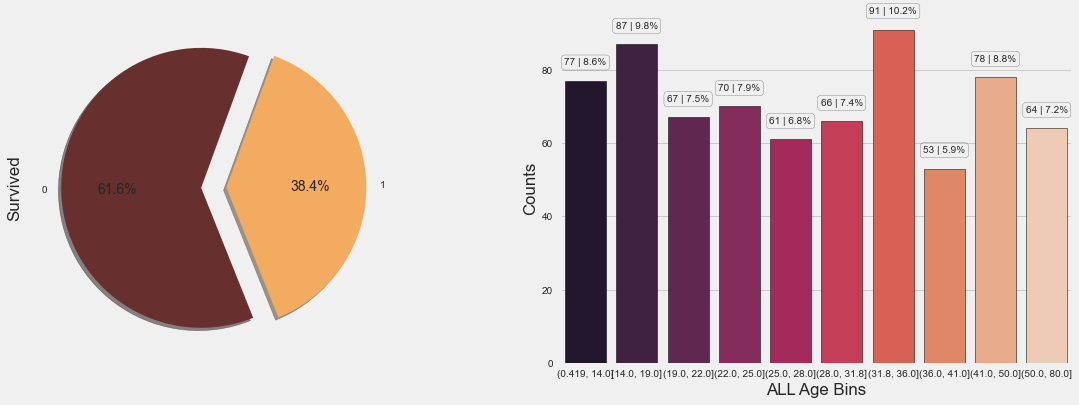

In [7]:
with plt.style.context('fivethirtyeight'): # background color set rcPram
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    eda_data['Survived'].value_counts().plot.pie(explode=[0, 0.18], autopct='%1.1f%%',
                                                 shadow=True, colors=['#682F2F', '#F3AB60'], startangle=70, ax=ax[0])
    
    age_bin = pd.qcut(eda_data['Age'], 10)
    age_counts = sns.barplot(x=age_bin.sort_index().value_counts().index, y=age_bin.value_counts().values,
                             linewidth=0.5, ec='black', zorder=3, palette='rocket', ax=ax[1])
    for i in age_counts.patches:
        values = f'{i.get_height():,.0f} | {i.get_height() / age_bin.shape[0]:,.1%}'
        x = i.get_x() + i.get_width() / 2
        y = i.get_y() + i.get_height() + 5
        age_counts.text(x, y, values, ha='center', va='center', fontsize=10, 
                        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
        ax[1].set_xlabel('ALL Age Bins')
        ax[1].set_ylabel('Counts')

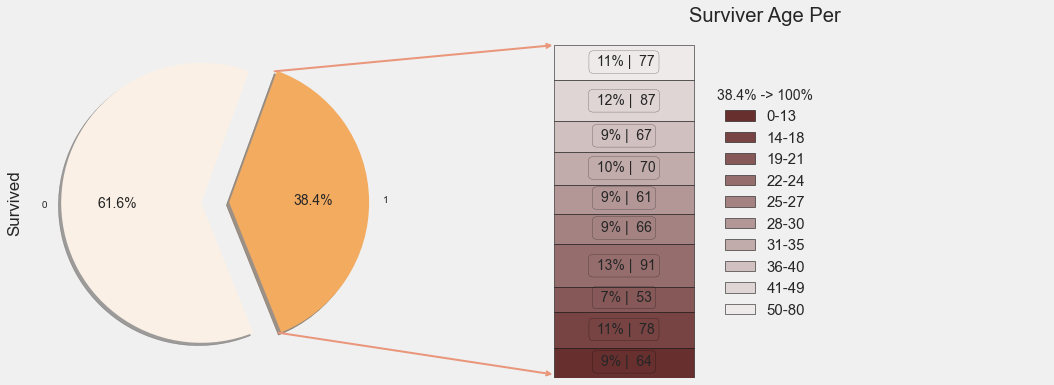

In [8]:
with plt.style.context('fivethirtyeight'): # background color set
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    fig.subplots_adjust(wspace=0)
    eda_data['Survived'].value_counts().plot.pie(explode=[0, 0.2], autopct='%1.1f%%',
                                                 shadow=True, colors=['#faf0e6', '#F3AB60'], startangle=70, ax=ax1)
    
    colors = ['#682f2f', '#774343', '#865858', '#956D6D', '#A48282',
              '#B39797', '#C2ABAB', '#D1C0C0', '#E0D5D5', '#EFEAEA']
    bar_per = eda_data['Survived'].groupby(age_bin).count()[::-1]
    bottom = 0
    for i in range(len(bar_per.values)):
        height = bar_per.values[i] / bar_per.values.sum()
        ax2.bar(-0.2, height=height, width=.2 ,bottom=bottom, color=colors[i], edgecolor='black')
        y = bottom + ax2.patches[i].get_height() / 2.5
        bottom += height
        values = f'{ax2.patches[i].get_height(): ,.0%} | {bar_per.values[i]: ,.0f}' # "%d%%" % (ax2.patches[i].get_height() *100)
        ax2.text(-0.2, y, values, ha='center',
                 bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))

    ax2.set_title('Surviver Age Per')
    # reversed legend
    ax2.legend(('0-13', '14-18', '19-21', '22-24', '25-27','28-30', '31-35', '36-40', '41-49', '50-80'), 
               title='38.4% -> 100%', loc='center', prop={'size':15})
    ax2.axis('off')
    ax2.set_xlim(-2.0 * .2, 2.0 * .2)

    theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
    center, r = ax1.patches[0].center, ax1.patches[0].r
    
    x = r * np.cos(np.pi / 173 * theta2) + center[0]
    y = r * np.sin(np.pi / 180 * theta2) + center[1]
    con = ConnectionPatch(xyA=(-.3, 0.01), xyB=(x, y), coordsA=ax2.transData, coordsB=ax1.transData, shrinkA=1, arrowstyle='<-')
    con.set_color('#e9967a')#e9967a
    con.set_linewidth(2)
    ax2.add_artist(con)

    x = r * np.cos(np.pi / 216 * theta1) + center[0]
    y = r * np.sin(np.pi / 180 * theta1) + center[1]
    con = ConnectionPatch(xyA=(-.3, 0.998), xyB=(x, y), coordsA=ax2.transData, coordsB=ax1.transData, shrinkA=1, arrowstyle='<-')
    con.set_color('#e9967a')#e9967a
    ax2.add_artist(con)
    con.set_linewidth(2)

In [9]:
def ms_pair_plot(values, hue='Survived'):
    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(1, 2, figsize=(18, 6))
        for i in range(len(values)):
            #fig, ax = plt.subplots(1, 2, figsize=(18, 6)) when plot_buplication is performed, inclusion 
            value = values[i]
            sns.histplot(x=value, hue=hue, data=eda_data, kde=True, palette='rocket', ax=ax[i])
            ax[i].axvline(x=eda_data[value].mean(), color='g', linestyle='--', linewidth=3)
            ax[i].axvline(x=eda_data[value].std(), color='c', linestyle=':', linewidth=3)
            ax[i].text(eda_data[value].mean(), eda_data[value].mean(), "<--Mean", horizontalalignment='left', size='small', color='black', weight='semibold')
            ax[i].text(eda_data[value].std(), eda_data[value].std(), "Std-->", horizontalalignment='right', size='small', color='black', weight='semibold')
            sns.despine()

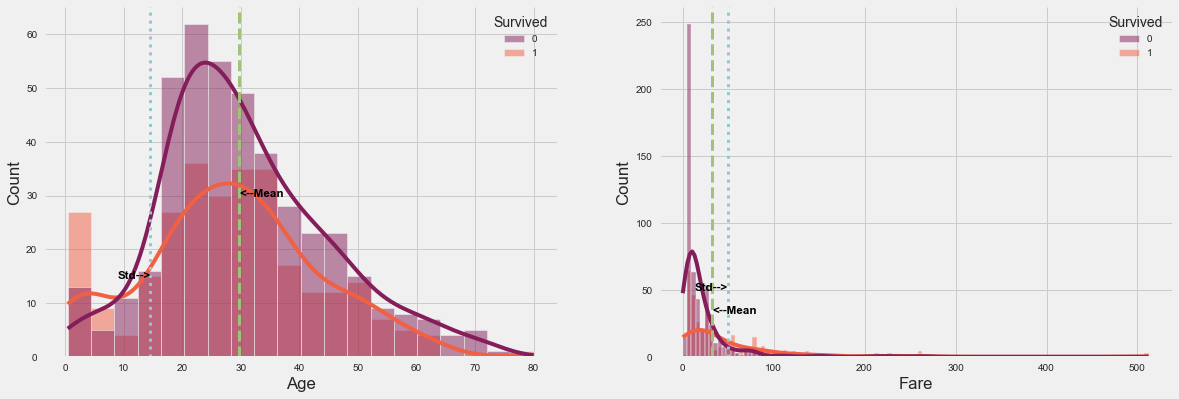

In [10]:
values = ['Age', 'Fare']
ms_pair_plot(values)

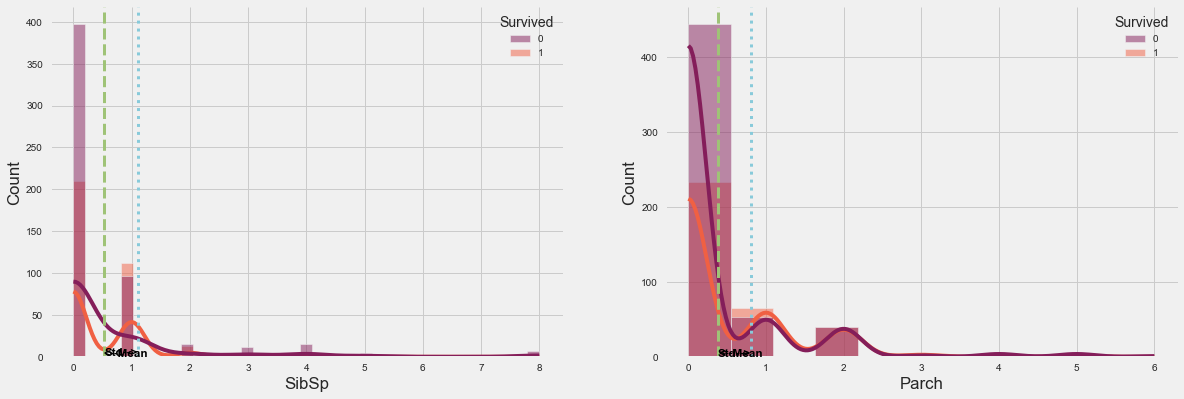

In [11]:
values = ['SibSp', 'Parch']
ms_pair_plot(values)

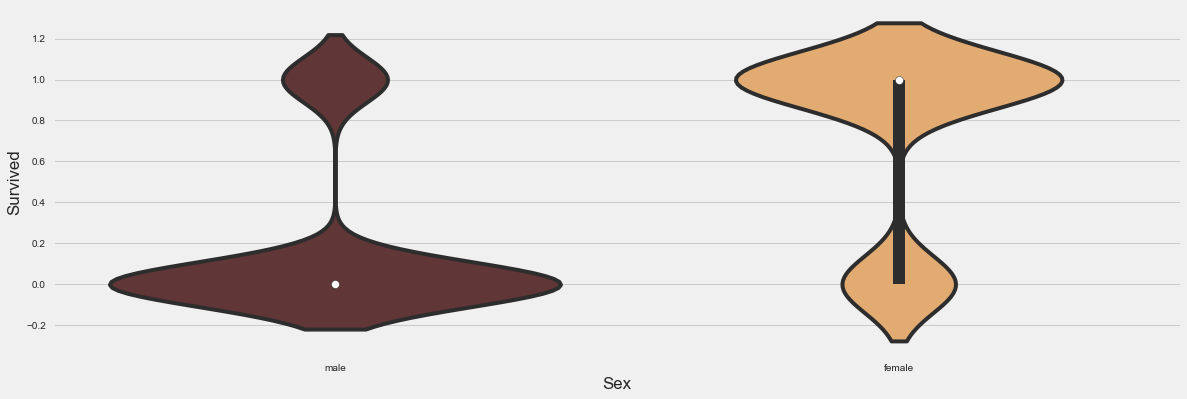

In [12]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize=(18, 6))
    sns.violinplot(x="Sex", y="Survived", data=eda_data, palette=['#682F2F', '#F3AB60'])
    #plt.ylim(-50, 200)

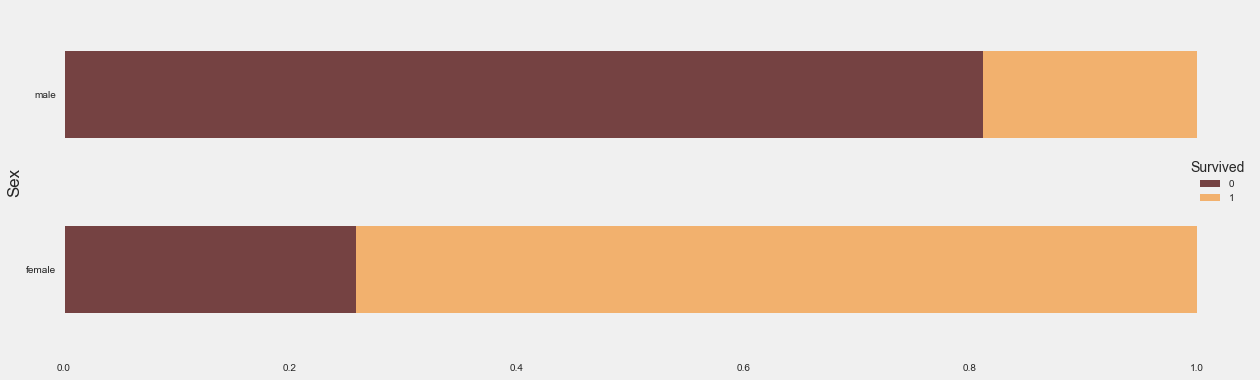

In [13]:
survived_count = pd.crosstab(eda_data['Sex'], eda_data['Survived'])
survived_pct = survived_count.div(survived_count.sum(1), axis=0)
with plt.style.context('fivethirtyeight'):
    survived_pct.plot.barh(stacked=True, figsize=(19, 6), alpha=0.9, grid=False, color=['#682F2F', '#F3AB60'])

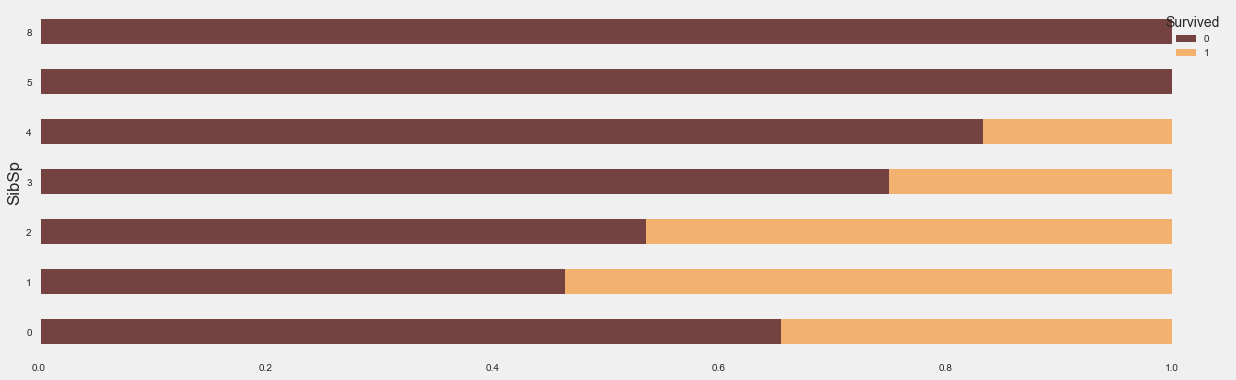

In [14]:
survived_count = pd.crosstab(eda_data['SibSp'], eda_data['Survived'])
survived_pct = survived_count.div(survived_count.sum(1), axis=0)
with plt.style.context('fivethirtyeight'):
    survived_pct.plot.barh(stacked=True, figsize=(19, 6), alpha=0.9, grid=False, color=['#682F2F', '#F3AB60'])

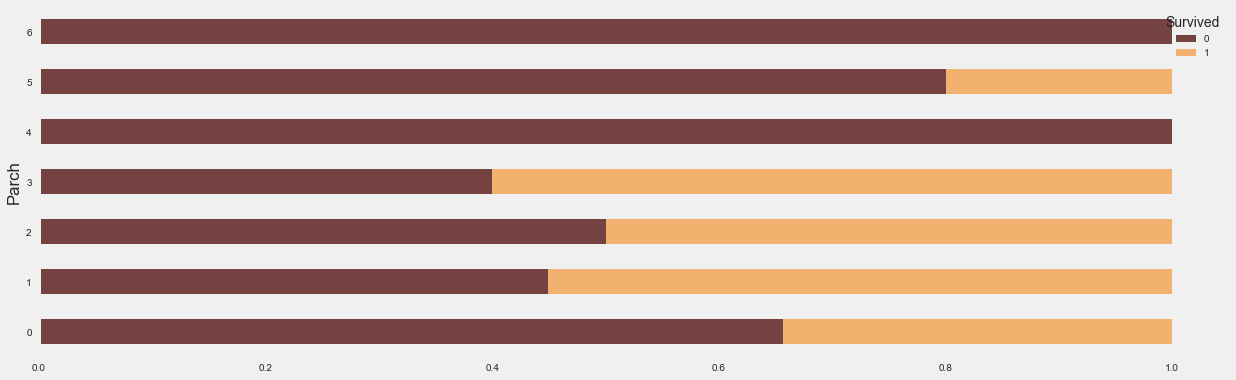

In [15]:
survived_count = pd.crosstab(eda_data['Parch'], eda_data['Survived'])
survived_pct = survived_count.div(survived_count.sum(1), axis=0)
with plt.style.context('fivethirtyeight'):
    survived_pct.plot.barh(stacked=True, figsize=(19, 6), alpha=0.9, grid=False, color=['#682F2F', '#F3AB60'])

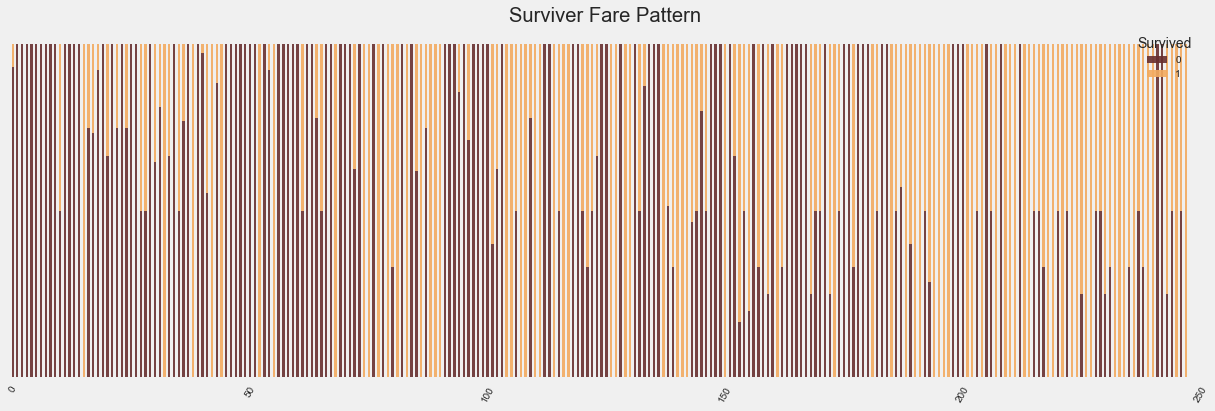

In [16]:
survived_count = pd.crosstab(eda_data['Fare'], eda_data['Survived'])
survived_pct = survived_count.div(survived_count.sum(1), axis=0)
with plt.style.context('fivethirtyeight'):
    survived_pct.plot.bar(stacked=True, alpha=0.9, figsize=(19, 6),
                          grid=False, use_index=None, logy=False,
                          rot=60, yticks=[], xticks=range(0, 251, 50),
                          title='Surviver Fare Pattern', color=['#682F2F', '#F3AB60'])

In [17]:
def trimming_ax(ax, N):
    f_axs = ax.flat
    for ax in f_axs[N:]:
        ax.remove()
    return f_axs[:N]

def cluster_bar_plot(data, product_list, cols=3, figsize=(19, 6)):
    product_list.append('')
    length = len(product_list)
    product_list.remove('')
    if length % 2 == 0:
        rows = length // cols
    else:
        rows = length // cols + 1
    with plt.style.context('fivethirtyeight'):
        
        ax = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)
        ax = trimming_ax(ax, length)
        for i, product in enumerate(product_list):
            cluster = data.query("Survived == {}".format(i))
            
            sns.barplot(x="Survived", y=product, data=data, palette='rocket', ax=ax[i])
            ax[i].legend(labels=['{}'.format(product)], title='P', loc=2, bbox_to_anchor=(1,1))
        
            sns.boxenplot(x="Survived", y="Fare", data=data, palette='rocket', ax=ax[-1])
            ax[-1].legend(labels=['Survived'], title='Survived_Number', loc=2, bbox_to_anchor=(1,1))

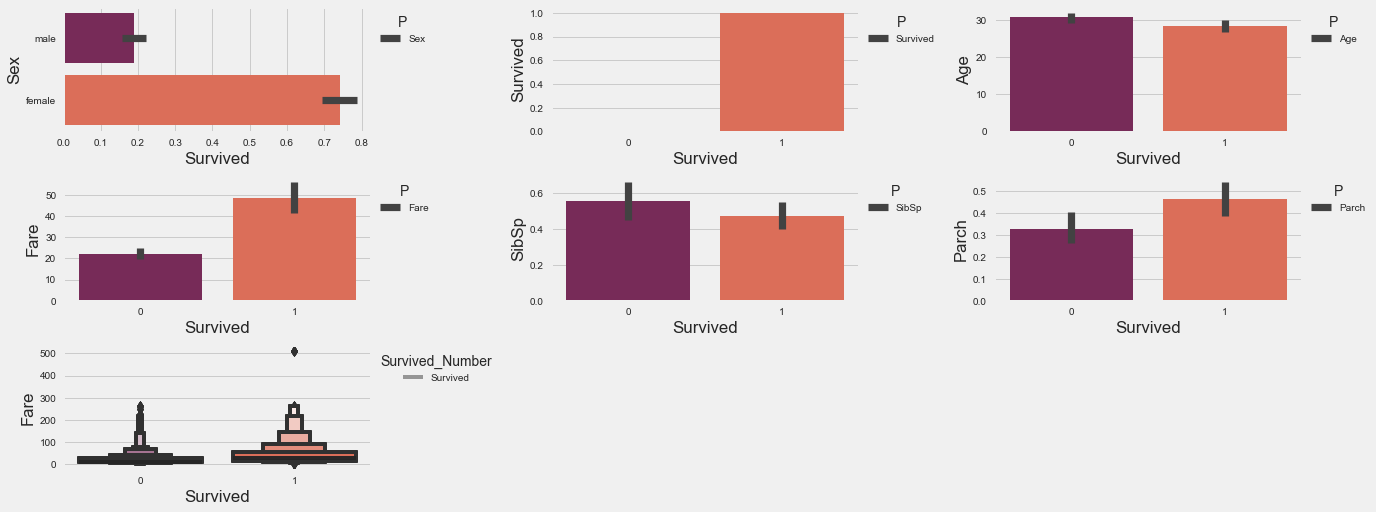

In [18]:
product_List = ['Sex','Survived', 'Age', 'Fare', 'SibSp','Parch']


cluster_bar_plot(eda_data, product_List, figsize=(19, 7))

In [19]:
def Survived_hist_plot(data, columns, cols=4, figsize=(10, 5)):
    #cols = cols
    rows = len(np.unique(data['Survived'])) // cols + 1
    bins = np.round(np.log(len(data)) + 1).astype(int) # Sturgess Formula : k=log2N+1
    ax = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)
    ax = trimming_ax(ax, len(np.unique(data['Survived'])))
    with plt.style.context('fivethirtyeight'):
        for i in np.unique(data['Survived']):
            cluster = data.query("Survived == {}".format(i))
            # replace plot
            sns.histplot(x=columns, data=cluster.reset_index(), bins=bins, ax=ax[i])
            #sns.countplot(x='Age', data=cluster.reset_index(), ax=ax[i])
            ax[i].legend(labels=['{}'.format(i)], title='Survived', loc=2, bbox_to_anchor=(1,1))

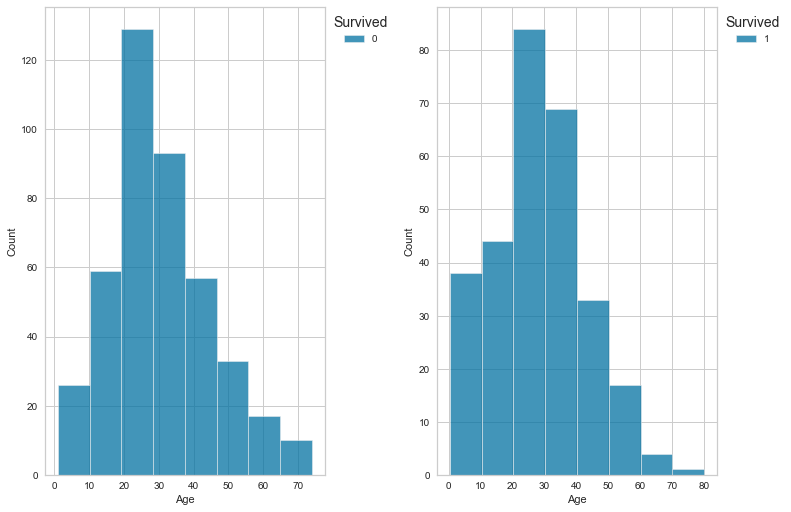

In [20]:
Survived_hist_plot(eda_data, columns='Age', figsize=(19, 7))

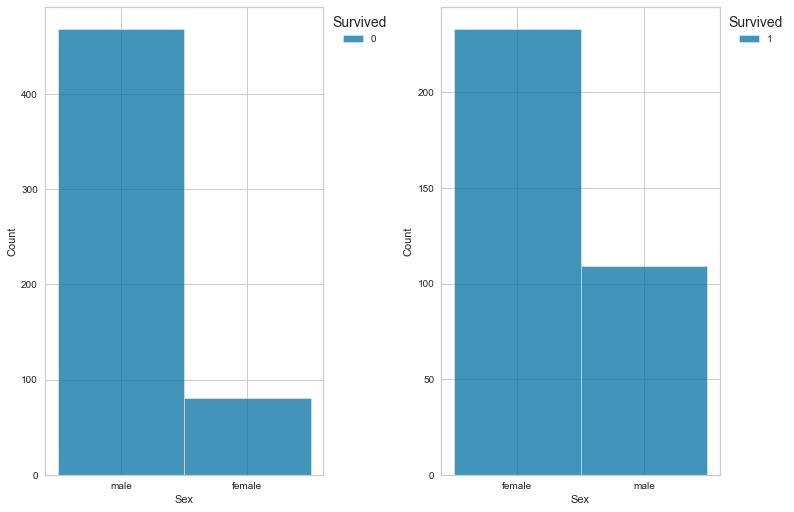

In [21]:
Survived_hist_plot(eda_data, columns='Sex', figsize=(19, 7))

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:300%;text-align:center;border-radius:10px 10px;">Other Data Plot</p>

#### ・Data Plot & Normalization
#### ・Dendrogram & HeatMap

In [22]:
def density_plot(data):
    density_per_col = [stats.gaussian_kde(col) for col in data.values.T]
    x = np.linspace(np.min(data.values), np.max(data.values), 100)
    
    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(figsize=(18, 6))
        for density in density_per_col:
            ax.plot(x, density(x))
        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        fig.legend(data, loc='right')

In [23]:
counts = data.copy()
counts.reset_index(inplace=True)
counts.drop(['Name', 'Cabin', 'Ticket', 'PassengerId', 'Sex', 'Embarked'], axis=1, inplace=True)
counts.fillna(0, inplace=True)
counts_nd = counts.values
log_counts = np.log(counts_nd + 1)
log_counts_pd = pd.DataFrame(log_counts, columns=counts.columns)

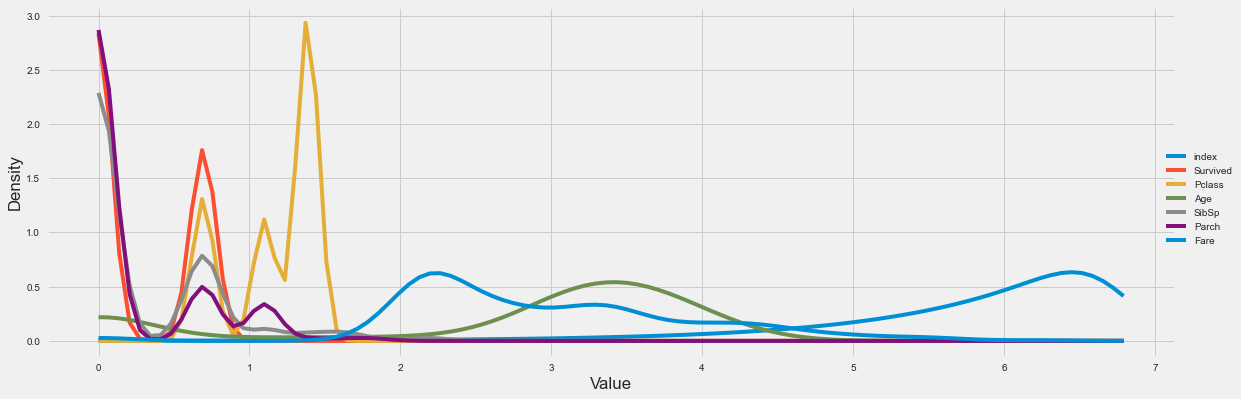

In [24]:
density_plot(log_counts_pd)

In [25]:
def quantile_norm(X):
    quantile = np.mean(np.sort(X, axis=0), axis=1) # quantile calculus
    rank = np.apply_along_axis(stats.rankdata, 0, X)
    rank_indices = rank.astype(np.int) - 1
    X_index = quantile[rank_indices]
    return X_index

def quantile_log(X):
    X_log = np.log(X + 1)
    Xi_log = quantile_norm(X_log)
    Xi_log_pd = pd.DataFrame(Xi_log, columns=X.columns)
    return Xi_log_pd

In [26]:
count_normalized = quantile_log(counts)

C:\Users\n\AppData\Local\Temp/ipykernel_5360/3953221472.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rank_indices = rank.astype(np.int) - 1


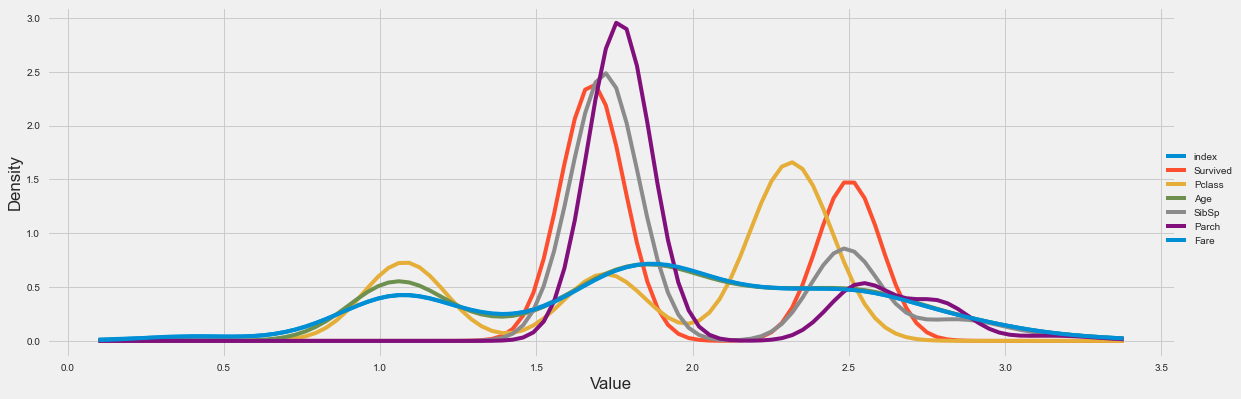

In [27]:
density_plot(count_normalized)

In [28]:
def most_variable_rows(data, *arg):
    rowvar = np.var(data, axis=1)
    sort_indices = np.argsort(rowvar)
    variable_data = data[sort_indices, :]
    return variable_data

from scipy.cluster.hierarchy import linkage

def bicluster(data, linkage_method='average', distance_metric='correlation'):
    y_rows = linkage(data, method=linkage_method, metric=distance_metric)
    y_cols = linkage(data.T, method=linkage_method, metric=distance_metric)
    return y_rows, y_cols

In [29]:
from scipy.cluster.hierarchy import dendrogram, leaves_list

def clear_spines(axes):
    for loc in ['left', 'right', 'top', 'bottom']:
        axes.spines[loc].set_visible(False)
    axes.set_xticks([])
    axes.set_yticks([])

def plot_bicluster(data, row_linkage, col_linkage, row_nclusters=10, col_nclusters=5):
    fig = plt.figure(figsize=(10, 10))
    
    ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])
    
    threshold_r = (row_linkage[-row_nclusters, 2] +
                   row_linkage[-row_nclusters+1, 2]) / 2
    with plt.rc_context({'lines.linewidth': 0.75}):
        dendrogram(row_linkage, orientation='left',
                   color_threshold=threshold_r, ax=ax1)
    clear_spines(ax1)
    
    ax2 = fig.add_axes([0.3, 0.71, 0.6, 0.2]) 
    threshold_c = (col_linkage[-col_nclusters, 2] +
                   col_linkage[-col_nclusters+1, 2]) / 2
    with plt.rc_context({'lines.linewidth': 0.75}):
        dendrogram(col_linkage,
                   color_threshold=threshold_c, ax=ax2)
    clear_spines(ax2)
    
    ax = fig.add_axes([0.3, 0.1, 0.6, 0.6])
    
    idx_rows = leaves_list(row_linkage)
    data = data[idx_rows, :]
    idx_cols = leaves_list(col_linkage)
    data = data[:, idx_cols]
    
    im = ax.imshow(data, aspect='auto', origin='lower', cmap='YlGnBu_r')
    clear_spines(ax)
    
    ax.set_xlabel('Columns')
    ax.set_ylabel('Index', labelpad=150)
    axcolor = fig.add_axes([0.91, 0.1, 0.02, 0.6])
    plt.colorbar(im, cax=axcolor)

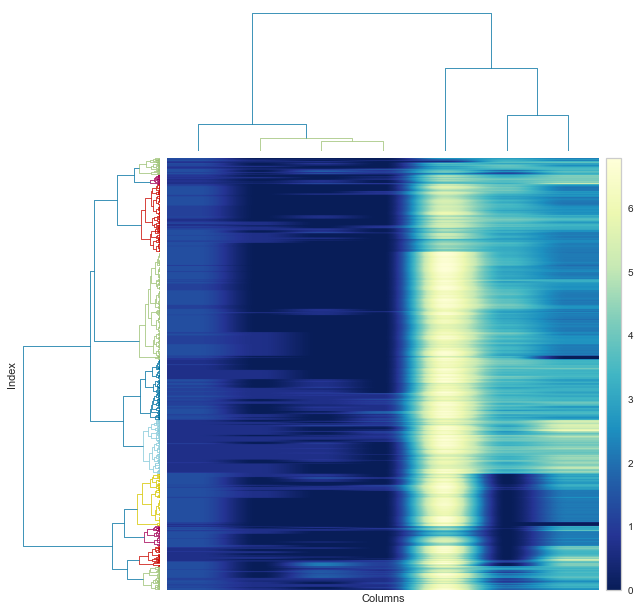

In [30]:
count_log = np.log(counts_nd + 1)
count_var = most_variable_rows(count_log)

yr, yc = bicluster(count_var, linkage_method='ward', distance_metric='euclidean')

plot_bicluster(count_var, yr, yc)

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:300%;text-align:center;border-radius:10px 10px;">Pre-Processing & Feature Enginiering</p>

- 以下に記述する事柄は方法論として記述する。哲学的データ探索、解析。統計解析に関しては主にEDAで使用する。

1. **データのクリーニング**
    - 外れ値を修正または除去
    - 欠損値を埋める(0,平均値,中央値)
3. **特徴量エンジニアリング**
    - 連続値の特徴量の離散化
    - 特徴量の分解(カテゴリカル)
    - 特徴量に効果が期待できる変換を加える(log(x), sqrt(x), x**2)
    - 特徴量を集計して新しい特徴量を作成する
4. **特徴量スケーリング**
    - 特徴量の標準化、正規化
    

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">特徴量エンジニアリングの方法論的考察</p>

## 論理的な哲学による方法論的考察による特徴量探索

1. 論理哲学的方法論

#(因果律項の不定常性に関して、株式市場、経済動態、現象の体現が常に不定常性であるという事は自明であり、その解説は不定常性であるという命題をもって解説されているので何故不定常性であるのかという解説はする意味が無いので省略する。)
>・モデルを訓練する前の下準備を行う際に最も時間を取られる作業の一つで、データサイエンスにおいて最も重要であると言える。どのような優れたモデルやパイプラインを持っていても与えるデータの質が悪ければ正確性,予測性,分類性は失われる。「ガーベージインガーベージアウト」
>
>・実在事象として帰結している結果を予測する場合、その事象が帰結に至った過程で通過した特徴量の全てを得なければ正確な予測を行う事は不可能 / 再現不能
>
>・Feature Enginieringを行う際、不要である「であろう」という推測の元に元のデータを削除するのは悪手である。その特徴量を細分化し、分析し、発生しうるであろう事象の全てを特徴量として成立させ訓練セットに内包させる必要がある。
>
>・実在事象として成立している事態の全体が事象の体現であり、成立している事態の全体は、どのような事態が成立していないかをも決定する。つまり、事態の成立・不成立が実在であると言え、その事態は互いに独立している。
>
>・事態の構造は、対象をもって構成される。対象とは　・不動・存続　であり、対象の配列は変動し影響を受け移ろうものである。この対象の配列が事態を構成し、対象は相互に組み合わさる。
>
>・事態の対象は、特定の条件で交互に関係する依存性質(相関)を持つ。つまり、事態のうちで対象が交互に依存する関係に対して因果性を内包する構造が、事態の構造であり、事実の構造は、いくつかの事態の構造によって構成されている。
>
>・因果性について、因果関係という状態は存在しないと仮定する。ある状況が成り立つ場合、それと全く異なる他の状態が成り立つことは、どのようにしようとも推理できないし、推理を正当化する因果関係といったものは存在しえない。
>
>・将来起こり得る事象を現在知り得ぬ所に自由意志が存在するのであって、因果関係が論理的な推論の必然性と同じ内包的必然性であるのであれば、その時に初めて事象の観測者は将来起こり得る事象を知りうる。知る行為と知られた事柄との関係は、論理的な必然性にもとづく関係となりうる。Aはxが成り立つことを知っているという命題は、xが同語反復命題である時、意味喪失する。
>
>・同語反復命題と矛盾問題。命題が自明であるから、その真であることが帰結しない以上、自明性はまた命題を真と考える保証にもならない。ある命題が他の命題から帰結するとき、後者は前者よりも多くの事を語り、前者は後者より僅かな事を語る。
>
>・pがqから帰結し、qがpから帰結するとき、pとqはまったく同一の命題となる。同語反復命題はすべての命題から帰結し、それは何も得られない。
>
>・矛盾命題とは、いかなる命題とそれを他の命題とは共有しないという点で命題に共通な要素。同語反復命題とは、たがいになんの共通点も持たない命題すべてに共通な要素であり、矛盾命題はすべての命題の外へ消滅し、同語反復命題はすべての命題の内に消滅するという事になる。つまり、矛盾命題はあらゆる命題の外の限界であり、同語反復命題はあらゆる命題の中心点であると言える。これは命題p,qと命題p,rとは、命題pを共有しているので、したがって、命題a,bが命題cを共有する、とは、cがa∨bから帰結することにほかならない。
>
>・真理関数の両極としての同語反復命題と矛盾命題において、n個の要素命題にたいしてLn個の真・偽条件の組が可能であり、一連の要素命題の真・偽の可能性から得られる真・偽条件の組は、順序をつけて配列される、すなわち真・偽条件の可能な組の中に二つの極端な場合がある。第一の場合には、命題は要素命題のいかなる真・偽の可能性に対しても真となる。この時、その真・偽条件は同語反復命題であると言い、第二の場合には命題はいかなる真・偽の可能性に対しても偽となる。その真・偽条件は矛盾であり、矛盾命題という。命題は、それが語るところのものを示し、同語反復命題と矛盾命題はそれらから何も得られない事を示す。
>
>・同語反復命題は、真・偽条件を持たない。それは無条件に真であるから。そして矛盾命題はいかなる条件のもとでも真とならない。同語反復命題において、実在現象の体現と一致するための諸条件、体現を叙述する関係は相互に打ち消し合う。その結果同語反復命題は実在に対してそれを叙述するという関係を持たなくなる。命題の真・偽条件はその命題が事実に許容する枠を定める。逆説的に同語反復命題は実在に対して無限の論理的空間を開放し、矛盾命題は論理的空間をくまなく満たして、実在にいかなる余地も与えない。したがって、どちらも実在を何らかの仕方で規定する事は不可能である。
同語反復命題が真である事は確実、命題が真であることは可能、矛盾命題が真であることは不可能であるという事に帰結する。
>
>・帰結の関係において、真理関数は順序をつけて配列出来る。これは確率論の基礎である。つまり、要素命題がいくつあろうとも、その真理関数は次のような図式を用意て書き上げられる。
>(True,True,True,True) (p,q) = p⊃p q⊂q , (False,True,True,True)(p,q) = (~(p.q)), (True,False,True,True)(p,q) = (p⊃q)　...
>
>・命題の独立変数の真・偽の可能性のうち、命題が真であると保証するその命題を真理根拠とする。仮に一連の命題に共通な真理根拠が既に、またあると特定の真理根拠になっているならば、この命題の真であることが、さきの一連の命題の真であることから帰結すると言える。ｐがｑから帰結するのであれば、そのときｐの意味はｑの意味に既に含まれている。つまり。ｑの真理根拠はｐの真理根拠に含まれており、ｐはｑから帰結すると言える。命題は、そこから帰結するいかなる命題をも肯定しうる。ｑがｐから帰結する時、ｑからｐへ推理する事が可能であり、ｑからｐを導く事が出来る。これら２つの命題自体が、そしてこの２つだけが推理を正当化しうる。この事から、全ての推理はア・プリオリに行われる事がわかり、１つの要素命題からは他のいかなる要素命題をも導けない事が証明される。
>
>・ア・プリオリと帰納法則における因果性。帰納法則とは論理法則ではない。何故ならこれは意味のある命題であるからと言える。この理由からして、帰納法則はア・プリオリでないと言える。因果律とは法則ではなく法則の形式である。因果律という名称、これはいわば属性名称であり特徴量に内包されると言える。これは力学分野で最小作用の法則のように最小の法則が存在するのと同様に、物理学における因果律、つまり因果形式の法則が存在する。ここで最小作用の法則を引き合いに出した理由を明確にしておく。最小作用の法則のなんたるかが正確に認知される以前から、最小作用の法則という不認知命題による法則は存在を予測されていたという事を念頭に置いておく必要がある。例えば、保存の法則をア・プリオリによって認識しえない。しかし論理的形式の可能性をあらかじめ知っている。充足理由律、時間連続性、自然経済性等、これらは諸命題を可能なかぎり整理するためのア・プリオリな洞察にほかならない。
>
>・因果律と時間連続体における体現に対しての不定常性。因果律が存在すると仮定した時、それは自然法則が存在するという主張に通じる。どのような出来事も時間の経過と比較することはできない。かかる時間の経過は存在しない。観測者は一つの出来事を他の出来事と比較しうるにすぎない、したがって時間の経過の記述が可能であるのは、ある他の出来事を支えとする場合に限られる。同様類似の事が空間にも妥当する。例えば、観測者が、二つの互いに排除しあう出来事において一方が他方に比して生起すべき理由が見当たらないことを口実に、そのどちらも生起しえぬと主張する場合、二つの出来事を区別するなんらかの非対称性が存在しえない限り、その片方を記述することは不可能であるという点にある。このような非対称性が存在するのであれば、観測者はこの非対称性を片方の出来事が生起しもう一方が生起しないことの原因であると解釈できる。つまり記述されるものは生起し、物理学における因果法則が容認せぬものはまた記述されないという事になる。これは時間連続体である4次元の中で我々観測者が干渉しうる3次元空間の定常性を肯定するが、3次元空間に依存する時間次元の相互干渉結果である4次元空間として時間的命題を取得している4次元時空における変化は不定常性であり続けるという事をも内包しうる。このことから不定常性という命題は証明され、時間とは観測者によって不定常であるとする特殊相対性理論を肯定する。
>
>・帰結した状態を正確に予測、分類するのであれば、因果性を内包した状態の時間連続体で発生、及び既に通過した命題を推理する事が最も重要であり、正確に予測できない理由はその事象が帰結した理由を因果律による命題が十分に特徴量に内包されていないという結論に至る。ここで重要な考え方は、特徴量の各項の命題には何の意味も無いという事。例えば年齢、収入、これらの命題は只の記号であってその状態を観測者に対して証明しうる解説の意味合い以外に意味を持たない。モデルに渡す場合の状態は既にlog()、sqrt()、X**2　等の正規化を配列に掛けてモデルへと渡される為、そもそもその状態をしらなければ内部は常時ブラックボックス化するのであるから、その命題を失った配列は観測者がその特徴量を認知する事は不可能になる。つまり、予測とは観測者に対して行われるものではなく、モデル自身が数学的帰結によって導き出した論理的結論なのであって、その状態に至った仮定を証明する方法論ではない事が分かるが、その状態を観測者が認知できなければモデル自身が数学的帰結を導き出す事は出来ないという事をも意味する。であるので、特徴量という認知を観測者が正確に認知できなければそれは正確な予測が不可能であることを証明する。
>
>つまりこれは「ガーベージインガーベージアウト」の根本的な証明になり、同時に時間連続体における不定常性の可能性変異事象をも証明しうる。そして特徴量探索において数学的方法論があくまで確率論的でしかない事を証明し、その確率の計算における特徴量探索の計算量は O(m**2*n) となる為、計算爆発を起こす可能性が指数的に上昇する事を意味する。つまり、特徴量探索は観測者の対象に対しての知識量に依存するという事になるが、同様にこれはその状態を導き出す可能性を内包すれば全ての特徴量を数学的に導き出す事も事実上不可能ではないという事を意味する。
これはニューラルネットワークでも同様であり、ニューロン数をいくら増やそうとも、最初に投入した犬の画像から猫の画像に再構築できないという事の証明でもある。これはそもそも猫という情報をニューラルネットワークに与えていない為、その情報を観測者に対する認知によって変質できない事を意味する。CNN,DNN,GANを利用しても猫という配列情報を学習出来ないニューロンが猫という命題を解説する物を送出する事は無い。これは人間自身の認知能力にも同様の事が言える。猫に類似した架空の動物が存在していたとしてその存在を知らない人間自身はその架空の動物を想像する事自体不可能であり、そもそも架空の動物を特定的に想像し、その形状を当てるなどというのは不可能であると言える。
>
>ここで、予測や分類という根本的命題が帰結する問題点に観測者による観測があって初めてそれは意味を含むという状態であるという観測者自身の認知が必要である。つまり、予測する、とは観測者の領域内での実態現象を内包する為、その観測者が存在しなければ予測や分類という状態は成り立たないのである。であるので、データサイエンスを行う為には方法論的に論理哲学的解釈が必須であると言える。数字とはあくまで観測者の領域内での認知における記号であってそれ以外の意味を含まない。数学や物理学は観測者の領域内の命題を観測者自身が画像的命題により認識する為の記号であってそれ以外の意味を全く含まない。

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:250%;text-align:center;border-radius:10px 10px;">データの統計解析</p>

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">統計分析</p>

- 基本的な分布の定義や統計的有意性の検定方法。
   
  - **ベイズ分析**
      - 将来の事象に対する従来の推定に、新しいデータがどのような影響を与えるかを厳密に評価する手法

- 統計学的な推論のプロセス
    - 潜在的に観測できるものの母集団。実際には母集団の比較的小さな一部だけを標本抽出する。
    - 標本抽出が、無作為に、つまり標本抽出された要素の性質を観測してもよいように行われることが望ましい。

- 確率論は、母集団の性質に基づいて、標本がどのような性質を持つかを推測する。
    - 統計的推移はそれとは逆向きに、標本の分析に基づいて母集団がどのような性質を持つかを推測する。
    
<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:100%;text-align:center;border-radius:10px 10px;">統計的分布</p>

- 観測する全ての変数は、どれくらいの頻度で特定の値が現れるかという度数分布を形成する
    - 身長、体重、IQなどの変数のユニーク性質(固有)は、分布によって捉えられる。
    - 特定のデータの観測を抽象化すると、その結果は独立して研究する価値のある確率分布になる
- 最も重要な確率分布(二項分布、正規分布、ポワソン分布、べき乗則分布)
- 必ずしもその分布が現れているとは限らない。
    - 統計的検定を使えば、実験的に観測されたデータが特定の分布から抽出された標本を反映したものなのかどうかを厳密に証明できる。
    - 現実世界のデータは有名な理論的分布のいずれにも正確に適合したりしない。
- 実際の観測値は、おそらく複数の母集団から抽出される
    - これらはいくらか異なった分布に従うもの。
    - 測定には誤差がつきもので、時々それが奇妙に系統的な形で現れることがある
- 古典的な分布が古典的である事は理由がある

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">二項分布</p>

- 二項分布は、n回の特別な順序のない独立した試行でちょうどｘ回Ｐ１が発生する確率を示す。
    - ここで大切なのは独立性
    - PDFの定義$$P(X=x) = \begin{pmatrix} n \\ x \end{pmatrix}p^x(1-p)^{(n-x)}$$
- 二項分布の確率密度関数(ＰＤＦ)、ポイントが複数ある
    - 離散的である
        - 二項分布の２つの亜ラメータ(nとx)は、整数でなければならない。
        - 滑らかな曲線に見えるのは、n=200がかなり大きいことによる錯覚
    - この分布の背後の理論を理解できる
        - パスカル三角形
            - ある試行でn回投げたうち、ちょうどｘ回表になるのは、(n,x)種類の表の出方のそれぞれについて確率px(1-p)(n-x)
    - ベル型の一種
        - 二項分布は平均が中央にくる完全な線対称になる。
            - ベルの形状は半分だけになる。
            - n -> ∞　平均が中央の対称的な分布
    - 2個だけのパラメータだけで定義される
        - 与えられた二項分布を完全に定義するために必要なのは、ｐとｎだけ
    - 多くの物が二項分布で合理的にモデリング可能
        - ｐ＝0.300のバッターの成績の分散を考える。
        - それぞれの打席で安打となる確率は p=0.3
        - シーズンあたりの打席数は n=500
        - シーズンあたりの安打数は二項分布で示せる。
            - 分布が二項分布だとわかれば、シミュレーションを使わなくても分布を構築
            - 安打数の期待値
                - μ = np = 500*0.3 = 150
            - その標準偏差
                - σ = √npq = √500*0.3*0.7 = 10.25
        - 単純な閉形式の数式が得られる

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">正規分布</p>

- 非常に多くの自然現象がベル型の曲線でモデリングできる。
- 大多数の値が平均近くに集中し、分布は対称的で極端すぎる値はない。(身長では3メートルの人間は存在した事がない)
- あらゆるベル型曲線の母は、ガウス分布、または正規分布とよばれるもの。
    - これらは平均と標準偏差の２つのパラメータだけで完全に定義できる。$$P(x)= \frac{1}{ \sigma  \sqrt{2 \pi } } e^{-(x- \mu )^2/2 \sigma ^2}$$
- 正規分布の確率密度関数(PDF)と累積分布関数(CFD)を示している
    - 連続的である
        - 正規分布のパラメータ(平均μと標準偏差σ)は σ > 0 という唯一の制限満たす限り、どのような実装でも構わない
    - おそらくどこからこの分布が導かれたかを説明できない
        - 正規分布は、平均の周辺への密度の度合いをσで示す二項分布を n -> ∞ によって一般化したもの
    - 正規分布は本当にベル型になっている
        - 正規分布は、典型的なベル型曲線である。離散的な度数(例えば、事象の数など)ではなく、連続変数(身長など)を扱っているので完全に滑らかになる。
        - 両方向に無限に続いているので、どちらに進んでもテールが切れることはない。
        - 正規分布は、この完全性を説明するために役立つ
    - 正規分布も2個のパラメータだけで定義
        - その2個は二項分布とは異なる。正規分布は中心点(平均μによって与えられる)とその広がり(標準偏差σによって与えられる)によって完全に定義される
            
            - 何が正規なのか？
                - 驚くほど自然発生的な現象が正規表現によってモデリングされる。
                - 最も重要なのは測定誤差
                - 小さな誤差は大きな誤差よりも発生しやすく、小さく大きくなる事は同程度にある
                    - 実験誤差はガウス雑音と呼ばれ、一般に正規分布に従う

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">正規分布に内在する意味</p>

- 平均と標準偏差があれば、すべての度数分布の特徴を大雑把に捉える事が可能。
- 正規分布の性質を捉える時にはこの２つが特に役に立つ
- この２つが正規分布を定義している。
    - 有名な正規分布の68%-95%-99.7%則を示したもの。
    - 確率関数の68%は平均から ±1σ 以内に入る
    - 確率関数の95%は平均から ±2σ 以内
    - 確率関数の99.7%は　　　　3σ 以内に入る
        - 正規分布に従う変数では、平均から遠く離れている(σを単位として)値は非常にまれ
        - 品質管理基準がきわめて高く、欠陥が出る確率が非常に低いことを表すためシックス・シグマという言葉が使われる
        - 正規分布で6σの事象が起こる確率は、約10億分の2
      　- この種のモデルは、極端なところで大きく外れるという重大な危険がある

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">ポワソン分布</p>

- まれな事象が発生する間隔の頻度を測定する
- 人間の一生を日々の事象のつながりによってモデリングすると、人は、わずか一定の確率 １－ｐ で今日呼吸する事を止める
- 寿命が n日であることは、生まれてから最初の n-1 日は、ずっと呼吸することに成功してきて、n日目にそのパターンが崩れたという事
    - 寿命が n日 になる確率は、P(n) = p**n-1(1-p) で計算$$\mu = \sum_{k=0}^ \infty  kP(k) $$

- ポワソン分布は基本的にこの分析に基づいたものだが、pよりも便利なパラメータを採用
    - pの代わりに、分布の平均、μを使う。
    - 個々のｐは、μを形成する特定の値を定義しているので、２つのパラメータはある意味同じだが、平均の方がずっと簡単に推定、測定できる。
    - ポワソン分布は、非常に単純な公式を生み出す。$$P(x)=  \frac{e^{- \mu } \mu ^{x}}{x!} $$

- 多くの分布がポワソン分布に見えてくる。それは、それらの分布がまれな事象の発生間隔を表す。
    - 電球の呼称の二項分布。二項分布により、何個壊れるかを予想するのは簡単になるが、電球の寿命の分布はわからない。この分布はポワソン分布
    - μ=1/p=1000 に対応するポワソン分布をプロット、これはほぼすべての電球は900時間から1,100時間の点灯で壊れるという状況を可視化できる

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">べき乗則分布</p>

- 正規分布やポワソン分布よりも長いテールを持つデータ分析
- これらの都市の平均人口は300,000人で、標準偏差(σ)は599,000という数
    - 平均と比べて標準偏差が大きすぎる時には、何かしらの問題がある
    - 正規分布では、確率関数の 99.7% が平均値から ±3σ 以内に入るため、人口が210万人以上の都市が現れることはない
    - 両対数グラフを描く。
        - このグラフが直線になっていることは、都市の人口がべき乗則分布に従っていることを示している
    - 都市に関しては、ニューヨークに至っては平均値から 13σ も上
        - 都市人口が正規分布に従っていないことは明らか、都市の人口はべき乗則という別の分布に従っている。
        - 与えられた変数Xに対し、べき乗則分布は次$$P(X = x) = cx^{-\alpha }$$
        - この分布は、指数α と正規化定数c の２つのパラメータを持つ。
        - この分布によって定義される確率は、曲線の下の面積$$A= \int_ \infty ^ \infty  cx^{- \alpha }dx=c \int_ \infty ^ \infty  x^{- \alpha }dx $$
    - Aの値は、パラメータαとcによって定義される。
        - 正規化定数c は、べき乗則が要求するA＝１を保証するために与えられたαに合わせて選ばれる。
        - ｃにそれ以外の意味はない。
        - 実際の作用は α によって決まる
    - べき乗則は「80:20」の法則を浮かび上がらせる。
        - これは世界の不平等を説明する。
        - Ａの上位20％がＢの80%を手に入れている事がみられる
        - 既に持っているものがもとになり、多くのものが手に入る確率が高くなる

- 多くの分布がこのような雪だるま式、ねずみ算式のものになっている
    - ｘ人のユーザを持つインターネットサイト
        - 多くのユーザを持つウェブサイトはそうでないサイトよりも多くの新ユーザを集める
        - 本人の友人がInstagramやFacebookを使っていたら、本人がInstagramやFacebookを使うようになる確率は他のサイトを使うようになる確率よりも高い。
        - 雪だるま式はべき乗則を導く
    - 相対的な頻度がｘの単語
        - 「algorist」「defenestrate」のようにまず使われない数百万の単語の長いテールがある。それに対し、「the」などの少数の単語よりも頻繁に使われている

- 自然言語の単語の使用頻度の分布はジップの法則によって規定
    - これは、使用頻度の順位がｋ位の単語は、最もよく使われる単語の1/k位の頻度でしか使われない
    - 順位が下がるとともに使用頻度が急速にさがっていく。
        - ここでべき乗則が働くのは何故か。
        - Fx~F1/xに対し、順位が2xの単語の使用頻度はFx~F1/F2である。
        - つまり順位が半分になると使用頻度は倍になる。これは α=1  のべき乗則に当たる
            - 既に多い物が優先されるというメカニズムは、べき乗則を導く
    
    - マグニチュードxの自信の頻度
        - 地震の強さを表すリヒタースケールは対数尺になっており、マグニチュード5.3は4.3の地震の10倍強い
        - マグニチュードが１増えると、強さは10倍ずつ増える
            - そのように急速に増える尺度では、大きな事象が小さな事象よりもまれになるのは当然
            - 大きければ大きい程まれになる
                - 無限に大きい事象が発生する可能性があっても、その可能性が指数的に低くなる時にはべき乗則が働く。
                - 戦争の数にも言える、ｘ人が犠牲になる衝突の数はべき乗則に従って減る。

### べき乗則は珍しいものではないという事を常に意識する
- 次の性質からべき乗則分布であるかわかる
    - 両対数グラフで描くとべき乗則分布は直線になる
        - データがまれになる端の方では隙間が空いているが、点は直線上に並んでいる。これがべき乗則分布の最大の特徴
        - この直線の傾きはα、すなわちべき乗則分布の形を<<定義する定数>>によって決まる
    - 平均を出しても意味が無い
        - ビルゲイツやイーロンマスク、ジェフベゾスが一人居るだけで、アメリカ人の平均資産は約300ドルも上がってしまう。アメリカの人口(3億人)
        - べき乗則分布のもとでは、無限の資産を持つ人間が生まれる可能性がごく小さいものの0ではない確率で存在する。
        - 観測値の平均値よりも中央値の方が性質がよくわかる
    - 標準偏差では意味が無い
        - べき乗則分布では、標準偏差は一般に平均以上になる
            - そのため、μとσ では、分布の性質はあまりつかめない。αとc の方が、べき乗則分布の性質をよく示す
                - 指数α 正規化定数c 
    - 分布はスケール不変
        - あらゆる指数関数はスケール不変であり、グラフの目盛りの刻みを変えても同じような形になる。
        - 300番目までの都市のプロットと、300位から600位までのプロットを個別に描いてもグラフはほぼ同じ形になる
        - グラフのどの一部を切り取ってもそれは直線の線分になる、それは線分のパラメータとグラフ全体のパラメータが同じである事

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">分布からのサンプリング</p>

- データがある分布に従っているかどうかのテスト、比較対象が必要
- 標準的な分布から理論に従って適切に生成された人工的なデータ
- 確率分布からのサンプリングには、逆関数法を用いたサンプリングと呼ばれる手法がある
- 確率密度関数(PDF)P と累積分布関数(CDF)C は、微積分で相互変換できる。$$P(k=X)=C \prime (k)=C(X  \leqq k) - C(X \leqq k- \delta  )$$ $$C(X \leqq k)= \int_{x=- \infty }^k P(X=x)dx $$
    - 一様乱数生成器を使えば、[0, 1]の範囲から値pを選ぶことができる。このｐを確率と解釈し、累積分布Cのインデックスとして使う
    - 一様乱数生成器が選んだ乱数 p=0.729 として、このCDFで p=0.729 となるような x値を返すと、x=0.62となる。
- 2次元以上から無作為なサンプリング
    - 受理棄却法
    - 円の中のすべての点のx,y座標は、-rからr までの範囲
        - ただしx,y座標が-rからrまでの範囲の点でも、円の外にも点がたくさんある

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">統計的有意性</p>

- データ観測に有意性があるかどうかを気にする
- 見つかったパターンや相関。見つかった相関は本物の現象を反映しているかどうか、偶然なのか。
    - つまり、観測には本当に有意性があるか。
- 大規模なデータセットで十分強い相関が見つかれば、それは「当然」意味があるように見えるかも知れない。
    - その理由の１つは相関があるからといって因果関係があるわけではない。
    - 観測に意味があるかどうかの微妙な区別、統計学が本領発揮
- 統計的有意性
    - 相関が統計的に有用かどうかを判断するためには、rだけでなく、標本サイズnも必要になる。
    - 伝統的に、無作為にｎ個の点の集合を取り出した時に、残差がｄを超える確率 α が α≦1/20=0.05 なら、n個の点の相関は有意であるという
    - 標本サイズが中分大きければ、相関係数の値が小さくても有意水準0.05で統計的に有意になる。
    - r=0.1 の相関では、分散のわずか1%しか説明できないものの、有意水準をα=0.05 とすれば、n=300 程度で統計的に有意になる
    - 特徴の多い大規模なデータモデルでは、弱くても有意な相関には価値がある。

    ## 相関があるからといって因果関係があるわけではない
    - 地域で活動している警察の数はその地域の犯罪率との間で強い相関を示すが、警察が犯罪の原因になっているわけではない
    - 服用している薬の量とその人が病気にかかっている確率には相関があるが、薬が病気の原因になっているわけではない。
    - 因果関係があったとしても、せいぜい一方向のもの。観測される相関の多くは、無関係で、どちらの変数ももう１つの変数に実際に影響を与えたりしない。
    - 相関があるからには因果関係があるだろうと思ってしまうのは、論理的な推論を理解している人々の間でもよく見られる誤った考え方
    - ＡがＢの原因になっているかどうかを導き出せる統計的な手段は殆どない。
    - 変数の１つを操作して、他の変数に与える影響を観測できるなら、対照実験をすることができる。
    
    ## 自己相関による周期性の検出方法
    - シーケンスを自分自身と比較する事を自己相関、1≦k≦n-1 に対する一連の自己相関を自己相関関数と呼ぶ。
    - 周期的なトレンドの検知
    - 自己相関は、以前の観測値をモデルの特徴として使えるので、将来の事象を予測する上で重要な概念
        - 経験に基づき、明日の天気も今日の天気と同じような物だろうと考えるのは、p=1日を周期とする自己相関によるもの
        - 6か月前の天気データ(p=180の周期)に基づく予測よりも、このモデルの方が正確なのは間違いない。
    - 一般に多くのものの自己相関関数は、非常に短い周期で最高。長期予測が短期予測よりも不正確になるのはそのため。
    - 一般に、長期間になると自己相関が大幅に弱くなる。
        - 天気の場合、季節による影響があるため、周期をp=180日とするよりも、p=365日とした方が正確
    
    ## 自己相関関数を完全に計算するためには
    - n-1 種類の周期で相関を計算しなければならない。nが大きくなるとコストがかかる。
    - 高速フーリエ変換(FFT：DFT)を使った効率のよいアルゴリズムがあり、それを使えば非常に長い期間を対象として自己相関関数を作ることが出来る。

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">有意性の重要性</p>

- 統計的有意性は、２つの分布の間には間違いなく違いがあるという自信の度合いを測ったもの
- その違いの大きさや重要性を測るわけではない。
- 標本のサイズが十分大きければ、極端に小さな差でも、統計的検定では有意性が高いとされることがある
- <<何かが起きた事が偶然によるものではない度合い>>がどの程度かが、有意性からわかるが、それが重要かどうかまではわからない
- 重要なのは、効果量、つまり２つのグループの差の大きさ。
   
   ### 効果量を測定しようとした統計量:相関係数
- 相関の測定に使われている主な統計量は2種類。
   ### 相関分析
- 1≦i≦n について (xi,yi) で表されるn点の標本の１つをxとyで表すものとする。
- xの値がわかれば yの値の予測に少しでも役立つ場合、x・yには相関があると言う。
- 相関係数r(X,Y)は、YがXの(そしてXがYの)線形関数になっている度合いを示す統計量である。
- 相関係数の範囲は-1から1までで、相関係数が１なら完全に相関があり、0なら相関なし、つまり両者は独立変数であることになる。
- 相関係数が負数なら、両者には負の相関がある。つまり、Xが増えるときにYは減る。
    - コーエンのｄ
       - 2つの平均 μとμ'の差がどの程度重要かは、差の絶対値によって決まるが、σやσ' で測定される分布の変化によっても決まる
           - 効果量の測定$$d = ( |  \mu - \acute{\mu} |  )/ \sigma $$
       - 合理的なしきい値
           - 小さな効果量が0.2、中程度の効果量が0.5、大きな効果量が0.8以上

    - ピアソンの相関係数r(Pythonの相関係数でよく使用される)(標本相関係数)
       - ２つの変数の間の線形関係の度合いを―1から1までの値で表す。効果量のしきい値は平均のずれとほぼ同じで、小さな効果量が±0.2以上、中程度の効果量が±0.5以上、大きな効果量が±0.8以上
       - XとYには強い相関があるものとする。
           - その場合、xiが平均値のXよりも大きければ、yiも平均値Yよりおおきくなり、xiが平均よりも小さければ、yiも平均より小さくなるはず。
           - 負の相関があるかもしれないときには、各項の符号は負になる(-1*1 or 1*-1)
           - XとYに相関がなければ、同じ頻度で正負の項が発生し、打ち消し合って、値は0に近づいていく。
           - 係数の符号を決める分子の操作は非常に役に立つため、<<共分散>>と呼ばれる。共分散の計算式を改めて示す。
            - ピアソンの相関係数の計算式の分母は、標準偏差を使って２つの変数の分散の度合いを示している。
            - この分母は、係数を-1から1までの範囲に収めるための操作をしている。
            $$r =  \frac{\displaystyle \sum_{i=1}^n (X_{i}- \bar{X} )(Y_{i}-\bar{Y}) }{ \sqrt{ \displaystyle\sum_{i=1}^n (X_{i}-\bar{X})^2 }\sqrt{\displaystyle\sum_{i=1}^n (Y_{i}-\bar{Y})^2} } =  \frac{\text{Cov}(X, Y)}{ \sigma (X)\sigma(Y)}$$
            - 共分散$$\text{Cov}(X,Y) =  \sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})$$
            
    - スピアマンの順位相関係数
         - 線形予測 y=m・x+b がフィットする度合いを定義する
         - ピアソンの相関係数は、変数間の類似性の測定にとても役に立つが、XとYの相関係数が0なのにYはXに完全に従属という例外がある
         - ピアソンの相関係数は、最良の線形予測がどの程度有効かを測定するが、絶対値のような例外的な関数については何も言えない
         - 基本的に順序が逆になっている入力点の対の数を数える。
         - すべての点の対に対する評価を集計し、<<適切に正規化>>すれば、スピアマンの順位相関係数になる
         - スピアマン係数は、線形でなくても単調な関数に高いスコアを付ける、ピアソンの相関係数よりも極端な外れ値に影響されない
         $$d_i = \text{rank}(x_i)-\text{rank}(y_i)$$
         $$\rho = 1- \frac{ 6\sum d_i^2 }{n(n^2-1)} $$
    
    - 変動係数r**2
        - 相関係数の2乗は、片方の変数の分散が、もう片方の変数の変数の分散をどの程度反映しているかを示す
            - しきい値は2乗に従い、小さな効果量が4%以上、中程度効果量25%以上、大きな効果量が64%
    
    - 重なり合いの割合(量子論の組み合わせとは関係ない)
        - １つの確率分布の下の面積は、定義上１
            - ２つの分布が重なり合っている部分の面積は、両者の類似度の良い尺度になる
                - 分布がまったく同じなら100%重なり合うが、間が離れていて重なり合いがなければ0%
                - 合理的なしきい値
                    - 小さな効果量85%以上、中程度効果量67%、大きな効果量53%以上重なり合う

- 統計的有意性は標本サイズによって左右されるが、効果量はそうではない。

## 相関の有意性と予測力
- 相関係数rは、与えられた標本Ｓで、ｘがｙの予測のためにどの程度使えるかを示す。|r|が1に近ければ近いほど、良い予測が得られる
    - 本当の問題は、標本の枠を抜け出して実世界データに適用した時、この相関がどの程度維持できるか
    - 強い相関があると言うためには、|r|が大きいというだけでなく、有意と言えるくらい多くの標本がなければならない。
    - 根拠となる点が多ければ多いほど、相関は明確になる。
        - 決定係数r**2 : 標本の相関係数の2乗r**2は、ＹをＸの単純な線形回帰でどのくらい説明できるかを表す値
            - rが小さくなると、r**2がいかに急激に小さくなるかを示している
            - 相関があるといっても、弱い相関には注意が必要。
                - 相関は0.5になると予測力は最大の時の25%に下がり、0.1%でわずか1%になる。
            - rが小さくなると、予測力はそれよりも急激に低下する

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">t検定：母平均の比較</p>

- ２つの母集団の間で平均が大きく離れていれば、効果量が大きくなる可能性がある。
- 定数がいくつあれば現象を本物だと考えてもよいのか。
    - ２つの標本平均はすくなくともある程度は異なるはずだが、この差は有意だろうか
- t検定は、２つの標本の母平均が異なるかどうかを評価する。A/Bテストでよく使用される

- t検定は、２つのグループの間で観測された差が有意かどうかを判断する。
    - 次の条件が満たされれば、２つの平均の差は有意
        - 平均の差が比較的大きい
            - これは説得力がある。効果量が非常に大きいため、平均して男性の方が体重が重いという事は簡単に言える
        - 標準偏差が十分小さい
            - 観測値が{3, 15, 6, 14, 17, 5}だとした時、μ=10であるという事を支持する気にはなれない。標準偏差が大きすぎる
        - 標本サイズが十分大きい
            - 観測されたデータが多ければ多いほど、標本が母集団の分布を正確に表していると確信しやすい。
    
    - t検定は、観測値を集めた２つの集合の検定統計量の計算から始まる
        - ウェルチのt検定$$t= \frac{ \bar{x}_{1} - \bar{x}_{2} }{ \sqrt{ \frac{ \sigma_{1^2}}{n_1} + \frac{ \sigma_{2^2}}{n_2} } } $$
            t = x1-x2/√σ1**2/n1+σ2**2/n2
            xi, μi, ni　はそれぞれ、標本の平均、標準偏差、標本サイズ
            
             - 分子は平均の差なので、この差が大きければ大きい程。ｔ統計量の値も大きくなる。
             - 標準偏差は分母にあるので、σiが小さければ小さい程ｔ統計量の値は大きくなる
             - 標本サイズniを大きくしたときにも分母は小さくなるため、niが大きければ大きい程、ｔ統計量の値は大きくなる
             - ２つの分布の間には本当に差があるという確信につながる３つの要因は、いずれもｔ統計量の値を大きくする

- t統計量の値の意味を解釈するためには、適切な表で値を照合する。
    - 望ましい 有意水準α と 自由度(基本的に標本サイズ) から、t統計量tが超えるべき値v がわかる　t>v なら、観測値は α水準で有意となる

- 自分で計算するのではなく、計算済みの表を見て数字を拾いだす習慣が根付いたのは複雑な計算が含まれる為
- 検定は、無作為抽出などの考え方を基礎としている。

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">コルモゴロフ・スミルノフ検定(KS検定)</p>

- ｔ検定は、正規分布に従うであろう母集団から２つの標本を抽出し、<<それぞれの平均からの距離を比較>>する
- それに対し、ＫＳ検定は
    - ２つの標本分布のＣＤＦ(累積分布関数)を比較して両者がどれくらい近いかを検証する
        - 同じグラフに２つの異なるＣＤＦをプロット
        - ２つの標本が同じ分布から抽出されたものなら、x値の範囲は大きく重なり合う
        - どちらも分布はＣＤＦで表されているため、yは0から1までの累積確率を表す
        - 関数はどちらも左から右に向かって単調に増加し、C(x)は値がx以下の標本の割合になる
    - 求めたいのは、２つのＣＤＦのｙの差が最大になるｘの値
        - C1,C2の2つの確率分布の距離D(C1,C2)は、このようにして求めたxにおけるyの差$$D(C_1,C_2)=\newcommand{\argmax}{\mathop{\rm max}\limits}\max_{- \infty \leqq x \leqq \infty}| C_1(x)-C_2(x) | $$
        - ある点で２つの分布の距離が離れて居れば離れている程、両者は別々の母集団から抽出された可能性が高い
    - KS検定はテールの近くに大きな差があることを見つける
    - KS検定は、特定ターゲットとの間で D(C1,C2) の値を比較し、次の式が成り立つ時、２つの分布は有意水準αで異なると判定する$$D(C_1,C_2)>c( \alpha ) \sqrt{ \frac{n_1+n_2}{n_1n_2} } $$
        - ここでc(α)は、ある表を参照すると得られる定数、どちらの標本も同じサイスであるとすると$$\sqrt{ \frac{n_1+n_2}{n1n2}}= \sqrt{ \frac{2n}{n^2}}= \sqrt{ \frac{2}{n}}   $$
    - 値√nは、サンプリング問題では二項分布の標準偏差のようにごく自然に登場する。
        - コイン投げをn回行ったときに表が出た回数と裏が出た回数の差は、√nのオーダーになると考えられる
        - この値が、この程度までなら２つの標本を同じだと考えてよいという逸脱の度合いを表す
        - ｔ検定よりも前提条件が少ないので、誤用する危険性が低い。
- ＫＳ検定は、データポイントが正規分布から抽出されたものかどうかのテストを含む多くの問題に応用可能

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">ボンフェローニ補正</p>

- 統計的に有意かどうかの基準として、伝統的に α＝0.05 が使われてきた。
    - 0.05の水準で有意とは、純粋な偶然でこの結果が得られた確率が1/20あるという事
- ボンフェローニ補正は明らかに有意に見える統計量をどのくらい信用してもよいかを測る上で重要
    - 相関を見つけるに至った<<経緯>>の重要性
- n種類の異なる仮設を同時に試した時に水準αで有意だと考えるためには、p値をα/nに下げる
- ここで示されている大原則は重要であり、理解する必要がある
- ボンフェローニ補正は自分を騙すのを防ぐ方法

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">誤検出率(False Discovery Rate)</p>

- ボンフェローニ補正は、多数の仮設を試す中で成功した唯一の仮設の有意性に飛びつかないようにするための自衛手段
- 大規模なデータセットを使うと、おそらく全てのｍ個の変数が、ターゲット変数と(おそらく弱く)相関している
    - ｍが十分大きければそれらの相関の多くは統計的に有意になる
    - しかし本当にそれは有意なのだろうか > ベンジャミーニ・ホッホベルク法

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">ベンジャミーニ・ホッホベルク法</p>

- 誤検出率を最小限に抑える手法で、有意性に基づいて面白い変数とそうでない変数の境界を引く
- ｐ値の強さによって変数をソートする
- そのため極端な変数は左側、有意性の低い変数は右側に集まる。
- 次の条件を満たす場合、この変数のα水準での有意性を認める$$\forall^i_{j=1} \big(p_j\leqq \frac{j}{m} \alpha  \big)$$

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">パーミュテーションテストとｐ値</p>

- 従来の統計的有意性検定は、２つの標本が同じ分布から得られたものかを判断するために非常に効果的
- しかしこれらの検定が力を発揮するのは適切に実施される必要がある
    - 標準的な検定の多くには、使う分布が１つか２つか、分布に前提条件を持ち込んでいるかどうかといった微妙な問題がある
- パーミュテーションテストはより一般性が高く、微妙な問題を気にせずに有意性の有無を判断できる。
- データが仮設を支持するなら、無作為にシャッフルされたデータセットがその仮説を支持する可能性は低い
- データを何度も無作為に並べ替えて試行すれば、テスト対象の現象がどの程度異常であるかをはっきり出来る
    - 元の分布の相関、
    - 元の分布に別の特徴量を無作為に加えたデータセットプロット
    - 特徴量加算後のデータセットをソート
- ランダムな順列から得られた統計量の分布の中で実データの統計量がどのランクになるかによって有意水準、つまりp値が決まる
    - 極端なテールは有意性が高い
    - 分布の密集の中に埋もれている場合は有意性が低い
- パーミュテーションテストではデータについての仮設を反映した統計量を用意する必要がある
    - 変数の特定の対の間に重要な関係があることを示したい時に用意する統計量
        - 相関係数
    - 実データで観測された相関の方が、無作為に並べ替えた順列で見られる相関よりも強くなる
        - 性別と身長の相関の検証では、用意する統計量は、男女の平均身長との差
            - この場合もランダムな順列よりも実データの方が差が大きくなる事を期待することになる
- パーミュテーションテストから得られる有意水準、p値は、ランダムな順列による試行を何回するかによって大きく左右される・
    - ランダムな順列による試行を少なくとも1000回、可能であればもっと多く行うようにする
        - この試行も限度はある

- (例)
- 連続試合安打は、無安打試合の間の安打試合の連続と考えられる
    - ポワソン分布を使ってモデリング出来る。
    - モンテカルロシミュレーションを行えば、数字を細かく考えなくても答えを得られる。
    - パーミュテーションテストは、最小限の知識で知見が得られる。

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;">ベイズ推定</p>

- 条件付き確率P(A|B)は、事象Ｂが発生した事がわかっているときの事象Ａの尤度(確からしさ)を測る
- 観測データなどの新たな証拠が現れたときに条件付き確率を使えば、事象に対する確信度を更新できる
    - 条件付き確率を扱うときには、条件を逆にしてくれるベイズ定理が重要$$P(A | B)= \frac{P(B | A)P(A)}{P(B)}$$
    - ベイズの定理を使えば、P(結果/データ) という問題を、もっと簡単に計算できる事が多い
        - P(データ｜結果)に変換できる
    - ベイズの定理は代数を使った結果だが、確率についての新たな考え方を生み出している
- 事象空間を４つのブロックから構成されていると考える
    - 複雑な事象であるＡとＢは、ブロックの範囲
        - P(A)=3/4, P(B)=2/4=1/2
        - ブロックを数えれば、P(A|B)=1/2 で P(B｜A)=1/3 $$P(A | B)= \frac{P(B | A)P(A)}{P(B)}= \frac{(1/3)・(3/4)}{(1 / 2)}=(1/2)  $$ $$P(A | B)= \frac{P(A | B)P(B)}{P(A)}= \frac{(1/2)・(1/2)}{(3 / 4)}=(1/3)  $$
            - これらはベイズの定理を直接反映してもいる
            - Aはデータ、つまりここではブロック数
            - Bは事象、ブロックの中の１つ
- ベイズ推定は、事前確率P(A)が、新しい観測Bの出現により、尤度P(B｜A)と周辺確率P(B)の割合に基づき、新しい事後確率P(A|B)に更新されると考える。事前確率P(A)は世界についての最初の想定であり、それが新たな証拠Ｂによって改訂される

- 新しい証拠による確率の変化を計算する方法としては最も説得力がある
    - ベイズの定理は新しい証拠Bによって事象Aが起こる確率が**<<どのように変化するか>>**を計算する手段
        - P(A|B)=P(B|A)P(A)/P(B)
    - ベイズの定理を**<<使う前>>**には、特定事象Ｂの状態を知る前に、事前確率P(A)と事象Ａの尤度がわかっていなければならない。
        - これは、他の特徴からAの状態を予測する分類器を実行して得ても、母集団の中での事象が発生する頻度についての背景知識によるものでもよい。
        - この事前確率としての質の高い推計力がなければ、分類器が言う事をどれくらい真剣に受け止めるべきかを判断しずらくなる

- [ ] (例). Aは人物ｘが実際にテロリストであるという事象、Ｂはｘがテロリストに見えるかどうかを判断する特徴ベースの分類器の分類結果とする。
    - 1000人分のデータセット(そのうちの半分がテロリスト)で訓練、評価した結果の分類器は90%という正確度を実現したとする
    - そして分類器が対象はテロリストのように見えると言っている。ここで、対象はテロリストだろうか。
        - ここで重要なのは、「ｘがテロリストである」事前確率が非常に低い事
        - アメリカ国内で活動しているテロリストが100人であるとすると、P(A)=100/300,000,000=3.33*10**-7である
        - 分類器がテロリストだと答える確率P(B)=0.5で、分類器がテロリストと答えた時、分類器の正しい確率はP(B|A)=0.9
            - これらを掛け合わせると次のようになる$$P(A | B)= \frac{P(B | A)P(A)}{P(B)} = \frac{(0.9)(3.33*10^{-7})}{(0.5)} =6 *10^{-7}$$
                - これは対象がテロリストである確率は、無作為に抽出した市民がテロリストである確率よりも高くなるが、本当のテロリストである確率は依然としてかなり低い
                
     - この分類器を正しく解釈するためには、事前確率を考慮に入れる事が欠かせない。
     - ベイズ推定は事前確率からスタートし、新たな証拠が事象の確率にどれくらい強く影響を与えるかを評価して結論を下す。
 
<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">対数</p>

- 対数は指数関数 y=b**x の逆関数で、この式は、x = logby と書き直せる。
    - $b^{\text{log}_by}=y$
- 指数関数は非常に速いペースで大きくなる。
    - b = {2**1, 2**2, 2**3, 2**4, ...}を考える
- 逆に、対数は非常にゆっくりしたペースで大きくなっていく。対数は、bの指数部分の{1, 2, 3, 4, ...}
    - 対数は、何らかの値ｂを繰り返し掛けていったり、ｂで繰り返し割っていくプロセスと対応
        - y = logbx <-> b**y = x
- 対数は非常に便利であり、データ分析では頻繁に使用する

## 対数が果たす３つの重要な役割
## 対数と確率の乗算
- 対数はもともと乗算を加算に変換して計算を楽にする為の手段
    - p = x・ｙ を計算するために、対数の加算 s=logbx+logby をしてから、対数の逆(つまり、bのs乗)
        - $p=x・ｙ＝b^{(log_{b}x+log_{b}y)}$
    - 多数の確率を掛け合わせるときは重要、確率は小さなあ数値
    - 確率の乗算をするよりも、次に示すように同じ結果が得られる確率の対数の合計を使った方が数値的安定性ははるかに高い
    - 本物の確率が必要なら、合計を使って計算すればよい。
    - 普通はその計算は不要、対数が大きい確率の方が確率としても大きいので、２つの確率のうちどちらが大きいかを比較したいだけなら、対数だけで済ませられる。
        - 対数のある性質に注意が必要。$\text{log}_2( \frac{1}{2}) = -1$
        - 確率の対数は、 log(1) = 0 を除きすべて負数。
        - 確率の対数を使った式にマイナス記号が入っているのはそのため
        - 対数確率と数値的安定性$$\prod_{i=1}^n p_i=b^P \quad but\quad P= \sum_{i=1}^n log_b(p_i) $$

## 対数と比率
- 比率は α/b という形の数値
- データセットの中では、基本特徴か２つの特徴の比という形でよく現れる。
- 比率は、条件に基づく正規化(例えば初期の重みに何らかの操作を加えたあとの重み)や時間に基づく正規化(例えば、前日の価格に対する当日の価格の比)といった形で一般的に発生
- 比率は減少よりも増加の方が大きく見えるという性質を持つ。
    - 200/100という比率は基準の200％, 100/200は基準の50%だけ
    - 変動の度合いは同じなのに、見かけの数字には差がある
    - そのため、比率の平均は統計を使ったごまかしになる  

## 対数と歪んだ分布の正規化
- 対称的でベル型に分布している変数は、モデルの特徴として適していることが多い。
- 分布を扱いやすいものに変換するため、正規化が必要
    - べき乗則の分布は、小さな値に手を付けず、大きな値を極端に小さくする非線形の変換を加えればわかりやすくなる。
    - 対数は、べき乗則に従う変数の変換に使われる。袖が長い(ロングテール)分布を対数に変換すると、良い結果になることが多い。
    - 対数正規分布に分布が従っていれば(対数化させる事も)、対数軸にすると完全なベル型になった。べき乗則の分布を示す変数は、対数を取ると正規分布に近くなる。

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:300%;text-align:center;border-radius:10px 10px;">線形代数</p>

- 線形代数に関しては、内容は院生けになっているので、数学恐怖症の方は読み飛ばしてもらっても構わないが、データサイエンスを行うのであれば少なからず数式には触れてしまうので数式から逃げるという事は不可能である事を現段階から認識しておく必要がある、心理学的におけるフロイトやカント、ヘーゲル的に言えば、防衛機構が数学という事象を拒否するのであれば、根本的に超自我への情報固定ができていない証拠である為、反復的に数式を見て慣れるという行動を行う必要がある事を認識しなければならない。

- データサイエンスプロジェクトのプロセスの一つは、情報を１つ以上の出来る限り大きなデータ行列に変換する事。
- 線形代数は行列の数学であるので、データサイエンスにとって重要な理解プロセスの一つである。これは数値を並べたものの性質とそれに作用する演算を研究する事でもあるため、多くの機械学習アルゴリズムの理解に必要な物の一つ。
- ここでは統計学項とは趣向を変え、基礎は簡易に留め、かなり高度な数式を使用する。

- データ：数値データセットの最も一般的に役に立つ形式は、$n*m$行列であり、$n$個の行が、物体、項目、事例を表すのに対し、$m$個の列はそれぞれ別々の特徴を表す。これはつまり座標軸であり、アルゴリズムでよく使用する偏微分操作の基礎と言える。
- 幾何学的な点の集合：$n*m$行列は、空間内の点の集まりを表現できる。$n$個の行はそれぞれ幾何学的な点を表すのに対し、$m$個の列は座標を定義する。一部の行列演算には幾何学的な解釈があり、可視化できる2次元幾何を高次元空間に一般化できる。
- 連立一次方程式：一次方程式は、次のように定数係数で重み付けされた変数の和として定義される$$y=c_0+c_1x_1+c_2x_2+\ldots+c_{m-1}x_{m-1}$$　$n$個の連立一次方程式は$n*m$行列で表現可能であり、この時各行は１つの方程式、$m$個の列は特定の変数の係数($c_0$は定数係数)に対応する。
- グラフ・ネットワーク：グラフは頂点と辺から構成され、辺は$(i,j)$のような頂点の順序対として定義される。$n$個の頂点と$m$本の辺をもつグラフは$n*n$の行列$M$で表せる。ここで$M[i,j]$は頂点$i$から頂点$j$への辺の数(重み)を表す。組み合わせ的性質と線形代数の間には、グラフの経路と行列の乗算の関係、頂点のクラスタと行列の固有値や固有ベクトルの関係が存在する。
### 線形代数の式の解釈
- 最小二乗法の線形回帰の背後に存在するアルゴリズム$$w=(A^TA)^{-1}A^Tb$$ここで$n*m$線形方程式は$Aw=b$で、$w$は最もよく当てはまる直線の係数ベクトル
- ０による除算のように線形代数の場合にも次元の不一致や特異行列などのような特別注意が必要な場合があるが、線形代数理論はこのような例外を除けばうまく機能するので、例外的条件を考慮せずに通常の条件で考えればよい。
### 幾何学とベクトル
- ベクトルは$1*d$行列であるが、原点Ｐからd次元空間にあるq点に向かう、向きを持った光線という便利な幾何学的解釈がある。このようなベクトルvを正規化して長さ１にすると、ベクトルはd次元球面に置かれる。平面内の点であれば円、d=3であれば真球、$d \geqq 4$なら不可視な超級(我々は3次元以上の状態を可視化してそれが何であるかを認知する事は出来ない為、不可視)。この正規化によって2点間の距離はベクトル間の角度になる。２つの近くにある点は、原点を間に挟んで小さな角度を形成する。距離が短いという事は角度が小さいという事。データの大きさの無視は正規化の１つの形で、すべての点を直接比較可能にする事が出来る為、機械学習では必須であると言える。
    - 内積は２つのベクトルをスカラーにする演算。要素が$n$個の２つのベクトル$A$と$B$の内積は、次$$A・B＝ \sum_{i=1}^n A_iB_i $$　内積演算を使えば、ベクトル$A$ベクトル$B$とが原点$O$に対して作る角$\theta =\angle AOB$が計算できる$$cos( \theta )= \frac{A・B}{ \| A \|  \|B  \| } $$ 記号$\|  V\| $は$V$の長さ。単位ベクトルの場合１になり、一般に$V$を$\|  V\| $で割ると、$V$は単位ベクトルになる。
    - 内積と角度の関係
        - 0度の角度を持つAとB=(x,y)がある時、単位ベクトルはA=(1,0)。この場合、内積は$1・x+0・y=x$であるのでBが単位ベクトルなら内積は正に$cos(\theta)$となる。これは一般のBや高次元でもこの事は成り立つ
    - 角度が小さければ小さい程、その球面で近い点になり、角度をラジアンで表した$0,\pi/2,\pi$に対応するコサイン関数の値$$cos(0)=1, cos(\pi/2)=0, cos(\pi)=-1$$コサイン関数の値は$[-1,1]$であり、相関係数の範囲と全く同じである上、解釈も同じ。２つの同一ベクトルは完全に正の相関関係にあるのに対し、向きが正反対のベクトルは完全に負の相関関係にある。直交する点やベクトル$\theta=\pi/2$は互いに無相関関係である。コサイン関数は各変数での平均が０でそういった２つの変数間の相関係数に対応する。単位ベクトルに対しては$\|A\|＝ \|B\| ＝1$AとBの角度は内積によって完全に定義される。２つのベクトルの内積は、ピアソンの相関係数とまったく同じで両者の類似度を測っている。

### 行列の加算
- 単純な演算。それぞれn*mの行列AとBがあるとき、$C=A+B$は次$$1 \leqq i \leqq n \quad and \quad 1\leqq j \leqq m = C_{ij}=A_{ij}+B_{ij}$$
- スカラー倍を使えば、行列内のすべての要素の重みを同時に変更でき、これは正規化に使用出来る。任意の行列Aと数値cがある時、$A\prime = cA$ $$1 \leqq i \leqq n \quad and \quad 1\leqq j \leqq m = C_{ij}=A \prime _{ij}+cA_{ij}$$
- 行列の加算とスカラー倍を使って行列を線形結合する。式$\alpha A+(1- \alpha )B$を使えば$A(\alpha=1)$ $B(\alpha=0)$の間で強弱をつけた画像を合成可能で、AからBにモーフィングできる。
- 行列$M$の転置は、行と列を交換し、$a*b$の行列$M$を$b*a$の行列$M^T$に変える$$1 \leqq i \leqq n \quad and \quad 1\leqq j \leqq m = M_{ij}^T=M_{ij}$$
- 正方業r手うの転置は正方行列になりこのとき$M$と$M^T$は問題なく加算と乗算が可能。$(A^T)^T=A$、正方行列の場合、行列とその転置行列を加算すると、対角線で対称となる。$$C_{ij}=A_{ij}+A_{ji}=C_{ji}$$

### 行列の乗算
- 行列の乗算とはベクトルのドット積、つまり内積の集合。$n$個の要素を持つ２つのベクトル$X$と$Y$があるとき、両者の内積$X・Y$は次$$X・Y=\sum_{i=1}^n X_iY_i $$内積は、２つのベクトルの類似度がどの程度かを示す２つのベクトルの対を１つの数値にまとめるための演算。これらの列ベクトルを使った行列積$X^TY$は、内積$Y・X$を要素とする$1*1$行列になる。一般行列で、行列積$C=AB$は次$$C_{ij}=\sum_{l=1}^k A_{ij}B_{lj}$$この計算を行う為には、AとBが共通の次元を持たなければならない。つまりAがn*kなら、Bはk*mである。積行列Cのn*mの各要素は、Aのi行とBのj列の内積。
    - 行列の重要な性質
        - 非可換：可換とは２つの演算子の順序を交換でき、$xy=yx$である事を指す。整数の乗算では可換性は自明だが、行列の乗算では順序が意味を持つ。正方行列の乗算でさえ、次のように非可換$$\begin{bmatrix}1 & 1 \\0 & 1 \end{bmatrix} \begin{bmatrix}1 & 1 \\1 & 0 \end{bmatrix} =\begin{bmatrix}2 & 1 \\1 & 0 \end{bmatrix} \neq \begin{bmatrix}1 & 1 \\1 & 0 \end{bmatrix}  \begin{bmatrix}1 & 1 \\0 & 1 \end{bmatrix} =\begin{bmatrix}1 & 2 \\1 & 1 \end{bmatrix}$$これは共分散行列でも同じ事が言える
        - 結合法則が成り立つ：結合法則が成り立つなら、かっこを自由にいれられる。つまり演算の順序を自由に選択できる。これは積$ABC$を計算するとき、$(AB)C$を計算しても$A(BC)$を計算してもよい。掛け合わせる行列の数が増えれば、自由度は更に広がる。行列の数によって演算の順序は指数的に増える。次は全く同じ答えになる$$\begin{pmatrix}  \begin{bmatrix}1 & 2 \\3 & 4 \end{bmatrix} \begin{bmatrix}1 & 0 \\0 & 2 \end{bmatrix}  \end{pmatrix}\begin{bmatrix}3 & 2 \\1 & 0 \end{bmatrix}=\begin{bmatrix}1 & 4 \\3 & 8 \end{bmatrix}\begin{bmatrix}3 & 2 \\1 & 0 \end{bmatrix} = \begin{bmatrix}7 & 2 \\17 & 6 \end{bmatrix}$$　$$\begin{bmatrix}1 & 2 \\3 & 4 \end{bmatrix} \begin{pmatrix}  \begin{bmatrix}1 & 0 \\0 & 2 \end{bmatrix}  \begin{bmatrix}3 & 2 \\1 & 0 \end{bmatrix} \end{pmatrix}= \begin{bmatrix}1& 2 \\3 & 4 \end{bmatrix} \begin{bmatrix}3 & 2 \\2 & 0 \end{bmatrix}= \begin{bmatrix}7 & 2 \\17 & 6 \end{bmatrix}$$
### 共分散行列
- 行列Aとその転置行列$A^T$は非常によく使用される演算、理由は乗算可能であるから。これは$A$が$n*d$行列なら、$A^T$が$d*n$行列であるので、$AA^T$という乗算はいつでも計算可能であり、計算順序の入れ替え$A^TA$も計算可能
    - これら２つの乗算には重要な解釈があり、Aがn*dの特徴行列で、１つの要素、点を表すn個の行とそれらの要素の観測された特徴を表すｄ個の列から構成されているものとした時、２つの共分散行列が得られる。
        - $C=AA^T$は、データポイント間の類似度を示す内積に基づいた$n*n$行列。$C_{ij}$は、要素iと要素jの類似度を示している。
        - $D=A^TA$は、列に割り当てられた特徴間の類似度を示す内で木に基づいた$d*d$行列。つまり$D_{ij}$は特徴iと特徴jの類似度を示している
        - これらの事を共分散行列と言う。相関係数の計算時の共分散公式は上記で記述した通り$$\text{Cov}(X,Y) =  \sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})$$であるので、厳密にはこの行列が共分散行列であるのは、Ａの行あるいは列の平均が0であるときだけだが、それを無視しても行列積の大きさは、特定の行または列の対がどの程度似た方向に動いているか示す。
### 行列の乗算・経路
- 正方行列は、転置しなくてもその行列自身と乗算可能である。$A^2=A*A$は行列Aの自乗と言い、より一般化すると$A^k$は、行列のｋ乗と呼ばれる。Aがグラフやネットワークの隣接行列を表すとき、行列Aの累乗には非常に自然な解釈がある。$(i,j)$がネットワークの辺であれば、隣接行列内の$A[i,j]=1$。ijが直接隣り合わない場合には$A[i,j]=0$このような要素が０と１の行列で、$A^2$はAの長さ２の経路の数を示す$$A^2[i,j]= \sum_{k=1}^n A[i,k] *A[k,j]$$
- 余談だが、GoogleのPageRankアルゴリズムや、今回のウイルスパンデミックの反復的なプロセスは全てこのようにシミュレートが出来る。

### 行列の乗算と並べ替え
- 行列の乗算は、ある行列の要素の順序を並べ替えるために使われる事も多い。
    - 並べ替えの最も有名なものは何もしない行列。単位行列は主対角線に沿って１の要素が並びそれ以外はすべて０のn*n行列であり、これはSparse(疎)行列と呼ばれる物でもある。現実の現象は殆どがこのように構成されている。$n=4$の場合は次$$I= \begin{bmatrix}1 & 0&0&0 \\0 & 1&0&0 \\ 0&0&1&0 \\ 0&0&0&1 \end{bmatrix}$$単位行列による乗算は可換である$AI=IA=A$。このような性質を持つ行列を置換行列と言う。
    - 空間内での点の回転も重要。回転行列$R_{\theta}$は、原点を中心として$\theta$度回転する処理を行う、2次元では$R_{\theta}$は次$$R_{\theta}= \begin{bmatrix}cos(\theta) & -sin(\theta) \\sin(\theta) & cos(\theta) \end{bmatrix} $$適切な回転・乗算を実行すると、点(x,y)は次の位置に移動する$$\begin{bmatrix}x \prime \\y \prime  \end{bmatrix}=R_{\theta} \begin{bmatrix}x \\y  \end{bmatrix} = \begin{bmatrix}x\cos(\theta) -y\sin(\theta) \\x\sin(\theta) + y\cos(\theta) \end{bmatrix}$$ $\theta=180°=\pi$ラジアンの場合$cos(\theta)=-1$で$sin(\theta)=0$なので、この計算は結局$(-x,-y)$となり、点を対角に置く事が分かる。
### 単位行列・逆行列
- 単位元を使った演算は、代数構造の中で大きな役割を果たす。数値の加算では、0+x=x+0=xなので0が単位元である。乗算では１が同じ役割を果たし、1・x=x・１=x
- 行列の乗算では、主対角線の要素だけが１で他の要素は０である単位行列が単位元。単位元による乗算は可換なので$IA=AI=A$
- 浮動小数点数演算は、本質的には不正確であり、加算と乗算を反復的に行う逆行列の乗算のようなアルゴリズムでは、処理の過程で生まれた誤差が蓄積されてしまう。
    -　逆行列の求め方。2*2行列Aの逆行列は次$$A^{-1}=\begin{bmatrix}a & b \\c & d \end{bmatrix} ^{-1}= \frac{1}{ab-bc}  \begin{bmatrix}d & -b \\-c & a \end{bmatrix}$$
    
<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">固有値と固有ベクトル</p>

### 何故固有値を計算するのか
- 解析力学は物理学や土木工学において遭遇する力学問題を解くのに有効な道具であるが、それだけではない、厳密な抽象的思考と実験的検証が互いに助け合いながらこんなに壮大に結び合っている分野は、おそらく他に無い。Euler - Lagurangeの理論、Hamilton-Jacobiの理論等々の偉大な理論の背景には限りなく豊かな哲学的意義が蓄えられている。それは数学的に知的歓喜を与える大きな源である(Colnelius Lanczos (コルネリウス・ランツォシュ))「The Variational Principles of Mechanics(力学の変分原理)」,The University Press, Tronto, 1962

    - ここで言うHamiltonian行列、Jacobi行列は機械学習の行列処理に非常に深い関わりを持つので気に留めておく必要がある。Hamiltonianは量子力学の分野でも登場し、シュレディンガー方程式の解である波動関数を記述する際にも使用される、この場合はエネルギー演算子(作用素)。これは化学分野の話であるので詳細は避ける。


- 正方行列AにベクトルUを掛けて得られた積は、スカラー$\lambda$にUを掛けたものと同じになることがある。$$\begin{bmatrix}-5 & 2 \\2 & -2 \end{bmatrix}  \begin{bmatrix}2\\-1 \end{bmatrix}= -6\begin{bmatrix}2\\-1 \end{bmatrix}$$ $$\begin{bmatrix}-5 & 2 \\2 & -2 \end{bmatrix}  \begin{bmatrix}2\\1 \end{bmatrix}= -1\begin{bmatrix}2\\1 \end{bmatrix}$$２つの等式はともに同じ$2*1$ベクトルUを右から掛けている。左辺ではUを行列Aに掛けているのに対し、右辺ではスカラー$\lambda$に掛けている。このように$AU=\lambda U$となるとき、$\lambda$を行列Aの**固有値**、Uをそれに対する**固有ベクトル**と呼ぶ。一般的にどの正方行列にもこのような固有ベクトルと固有値の組み合わせは複数あり、第二の列が第一の列と同じ行列Ａを使っているのに、異なるＵと$\lambda$の組み合わせが得られる。
### 固有値の性質
- 個々の固有値には対応する固有ベクトルがあり、固有値と固有ベクトルは必ず対
- フルランク$n*n$行列にはn種類の固有ベクトルと固有値の対
- 実数の対称行列とする固有ベクトルを2つ取り出した時、それらは平面乗でｘ軸とｙ軸が直交しているのと同じように直交
- 固有ベクトルは何らかのn次元空間の座標系の一部、基底の一部をなす。これは行列のさまざまな幾何学的解釈の可能性の広がりで、あらゆる行列が固有値と固有ベクトルによって変換可能で、そのとき固有値は対応する固有ベクトルの大きさを表す事
### 固有値の計算
- ランクがnの行列のn個の固有値は、その行列の特性方程式を解けば求められる。$AU= \lambda U$という方程式を定義。これに単位行列Ｉを掛けても等式に影響しないので次$$AU=\lambda IU\mapsto (A-\lambda I)U=0 $$　$$A-\lambda I＝ \begin{bmatrix}-5-\lambda & 2 \\2 & -2-\lambda \end{bmatrix}$$ ベクトルUに任意のスカラーｃを掛けても$(A-\lambda I)U=0$が成り立つ。つまり解は無限個であり、連立方程式の解は不定。そのような場合、行列式は０になるはずで、２＊２行列の場合、行列式はクロス積$ab-bc$なので$$(-5-\lambda)(-2-\lambda)-2・2=\lambda^2+7\lambda+6=0$$となる。この2次方程式を解くと、$\lambda=-1, \lambda=-6$が得られる。一般に行列式$|  A-\lambda I|$は、n次の多項式なので、このような特徴方程式の根がＡの固有値となる。固有値に対応する固有ベクトルは、連立方程式を解けば計算可能。で例として任意の固有値$\lambda$と対応する固有ベクトル$U=\begin{bmatrix}u_1 \\u_2 \end{bmatrix}$ $$\begin{bmatrix}-5 & 2 \\2 & -2 \end{bmatrix}  \begin{bmatrix}u_1 \\u_2 \end{bmatrix} =\lambda \begin{bmatrix}u_1 \\u_2 \end{bmatrix} $$ $\lambda$が分かれば、ｎ個の未知数があるｎ個の線形方程式が得られ、Ｕの値を解ける。$\lambda = -1$の場合$$-5u_1 + 2u_2=-1u_1 \longrightarrow -4u_1+2u_2=0$$ $$2u_1+-2u_2=-1u_2 \longrightarrow 2u_1+-1u_2=0$$解は、$u_1=1, u_2=2$であり、ここから固有ベクトルを求められる。$\lambda = -6$は次$$-5u_1+-2u_2=-6u_1 \longrightarrow 1u_1+-2u_2=0$$ $$2u_1+-2u_2=-6u_2 \longrightarrow 2u_1+-4u_2=0$$こちらは解が不定なので、$u_1=2, u_2=-1$とその任意の定数倍が固有ベクトルになる。これらの固有値や固有ベクトルの計算にはQR分解と呼ばれる行列の分解を使ったより高速なアルゴリズムが存在する、これはPandas等でもライブラリに存在しているので、こちらを使うべきと言える。
### 固有値分解
- 実数の任意の$n*n$対称行列$M$は、ｎ個の固有ベクトルの積の総和に分解できる。ここで固有ベクトル$U_i$と固有値$\lambda_i$と仮定した時、固有対は固有値の大きい順に並べるので全ての$i>1$について$\lambda_i \geqq \lambda_{i-1}$個々の固有ベクトル$U_i$は$n*1$行列であり、みずからの転置と掛けた積の$U_iU_i^T$は$n*n$行列になる。これは元のM次元と同じ次元。対応する固有値を重みとしてこれらの行列を線形結合したものを次、これはもとの行列の再構築$$M = \sum_{i=1}^n \lambda_i U_i U_i^t$$これが成り立つのは対称行列のみで、高次元配列の画像等には適用できない。しかし、行列の各行列の基本的な特徴を符号化する共分散行列は常に対称行列。その為、共分散行列は固有値分解で表せるという事になる。
### 微分方程式と差分方程式
- 線形連立微分方程式・線形連立差分方程式の安定性について。**<<これらの理解はMarkov連鎖Markov決定過程の理解に必要である為記述する>>**
    - 線形微分方程式
    - 線形1階連立方程式$$u(0)=u_0, \frac{du}{dt} = Au, t \geqq 0$$を考える、ここで、$u$は$R^n$のベクトルで時間$t$の関数であり、Aは$n*n$型の定数の行列であるとする。$A=XJX^{-1}$を$A$のスペクトル分解とし、$\nu=X^{-1}u$とおくと、$$\frac{du}{dt}=Ju$$となるここで、JはAのJordan標準型。$u(0)=u_0$の解が$$u(t)=e^{At}u_0=Xe^{Jt}X^{-1}u0$$ここで$e^{Jt}$は上三角行列で、その要素は$t^je^{\lambda it}, \lambda_i \in sp(A) (0 \leqq j  <  \ell_i)$,$( \ell_i\text{は}\lambda_i\text{の指標})$という形式をしている。$ｔ  \rightarrow  \infty $の時、解が$u(t)=e^{At}u_0=Xe^{Jt}X^{-1}u0$の性質を調べると$u(0)=u_0, \frac{du}{dt} = Au, t \geqq 0$が安定で$u(t) \rightarrow 0$となる為の必要十分条件は$$\newcommand{\max}{\mathop{\rm max}\limits}\max_{\lambda_i\in sp(A)}Re\lambda_i < 0$$となる。$$Re\lambda > 0$$を満たす**固有値**$\lambda$が存在すれば、不安定で$u(t)$は有界ではない。$\newcommand{\max}{\mathop{\rm max}\limits}\max_{\lambda_i}Re\lambda_i = 0$のときには$Re\lambda_i=0$となるような固有値$\lambda_j$になるような固有値$\lambda_j$が、全て半単純であるかあるいは少なくとも1個が欠陥を有しているかによって解$u(t)$は有界であることも有界でないこともありうる。
        - 時間ｔを連続変数と考えた時の拡散現象をモデル化したものであって、時間の離散値だけしかかんがえないときには、このような幻想の安定化には線形差分方程式が登場する。
    - 差分方程式
    - 線形連続差分方程式$$u(0), u_k=Au_{k-1}, k\geqq 1$$を考える。明らかに$u_k=A^ku_0=XJ^kX^{-1}u0$である、ただし$J^k$は上三角行列でその要素は$\lambda_i^j(\lambda_i \in sp(A), k-\ell_i+1 \leqq j  \leqq k)$, $k \rightarrow  \infty $のとき$u_k$の性質を調べると次、安定で$u_k\rightarrow  0$であるための必要十分条件は$$\newcommand{\max}{\mathop{\rm max}\limits} \rho (A)=\max_{\lambda_i}| \lambda_i| < 1$$であることがわかる。$|\lambda| > |$を満たす固有値$\lambda$が存在するならば不安定で$u_k$は有界ではない。
        - Fibonacci数列を考える$$\begin{cases}f_0=0 &f_i=1 \\f_{k+1}=f_{k}+f_{k-1} & f\geqq 1\end{cases}$$ $u_k=\begin{bmatrix}f_{k+1} \\f_k \end{bmatrix}$と置くと$$\begin{cases}u_0= \begin{bmatrix}1\\0 \end{bmatrix} \\u_k= \begin{bmatrix}1 & 1 \\1 & 0 \end{bmatrix}u_{k-1}  & k \geqq 1\end{cases}$$となる。行列$\begin{bmatrix}1 & 1 \\1 & 0 \end{bmatrix} $の固有値は$\frac{1+ \sqrt{5} }{2} , \frac{1- \sqrt{5} }{2}$で、$k \rightarrow  \infty$の時、$\frac{f_{k+1}}{f_k}$は**黄金比分割**$\frac{1+ \sqrt{5} }{2}$に近づく。
 - これらの事からわかるのは、現象が時間連続体における連立微分方程式によりモデル化されるときには系の安定性は行列の固有値の実部に依存し、離散時間の連立差分方程式によりモデル化されるときには系の安定性は行列の固有値の絶対値に依存する

### Markov連鎖
- 確率変数$X_t(t \in T_r)$の集合を**確率過程**と呼ぶ。時刻ｔに郵便局の為替の窓口に行列を作っている人数は$X_t$で表す事が出来る。確率過程論は**待ち行列**(電話網、道路網、情報網等)の研究に使用されている。これは**記憶なし**の確率過程。この過程には決まった数の状態があり、各ステップで無作為にある状態から別の状態に遷移していく。ある状態$s$が別の状態$s \prime $に遷移する確率は固定されており、それは過去の状態とは無関係に(記憶がない理由)$(s, s\prime)$のペアだけによって決まる。マルコフ連鎖は多様な動態を持つことができ、熱力学、科学、統計学等だまざまな分野で多用される。**マルコフ決定過程**はマルコフ連鎖に少し修正が加えられたものであり、マルコフ決定過程は強化学習に使用されるので、まずマルコフ連鎖の詳細を以下に記述する。$$P(X_k=j|X_ \ell =i \ell , \ell =0,  \cdots ,k-1)=P(X_k=j|X_{k-1}=i_{k-1})$$これをMarkov連鎖と呼ぶ。ここで$P(E)$は事象$E$の確率を表す。Markov連鎖に対して次のような術語がしばしば用いられる。すなわち離散的な値$k=0,1,\cdots$を取る時間とともに変化する系は、$X_k=j$であるとき時刻$k$において状態$j$にあるという。確率$p_ij^{(k)}=P(X_k=j|X_{k-1}=i)$は推移確率で、$p_{ij}^{(k)}$がｋに関係しないとき、**定常Markov連鎖**である。
- ｎ個の状態をとりうる定常Markov連鎖には、推移確率行列と呼ばれるｎ次の行列で、$$P=(p_{ij}),\quad p_{ij}\geqq 0,\quad \sum_{j=1}^n p_{ij}=1$$を満たすＰが付随させられる。Ｐは**確率行列**
- 例：設備(電球、電子部品、TV等)の故障による取り換えの過程は、取り換え後の設備の耐用時間が取り換え前の設備の耐用時間とは独立な確率変数で同じ確率分布を持つ時、Markov連鎖に関連付けることが出来る。確率変数$A_k$＝(時刻ｋにおける設備の年齢)がMarkov連鎖をなす。定常Markov連鎖に関連づけられる系の時間的変化は、推移確率行列Pと初期確率$q_j^{(0)}=P(X_0=j),j=1,\cdots,n$によって定められる。$q_j^{(k)}=P(X_k=j),k=0,1,2,\cdots,\quad q^{(k)}=(q_1^{(k)},\cdots,q_n^{(k)})\quad,\sum_{j=1}^n q_j^{(k)}=\| q^{(k)} \| _1=1$であり、$$q^{(k)}=q^{(0)}P^k$$ $$q_{j^{(k)}}=\sum_{i=1}^n P(X_k=j|X_{k-1}=i)P(X_{k-1}=i)$$ $$=\sum_{i=1}^n p_{ij}q_{i^{(k-1)}},\qquad j=1,\cdots,n$$t定常Markov連鎖の漸近的なふるまいは定常分布$\pi= \lim_{k \rightarrow  \infty } q^{(k)}$によって定められている。定常分布$\pi$は$$\pi=\pi P, \quad \| \pi \|_1 = 1, \quad \pi_i\geqq0 $$を満たす。推移確率行列Pが既約であれば、上記を満たす定常分布$\pi$が存在する。Ｐは確率行列であるから、固有値１をもち、$\pi^T$はこの固有値に付随する左固有ベクトルであり、Pが既約であれば、Perron-Frobenius定理により、１はPの単純固有値で、$\pi$の全成分が正。
- 定常分布$\pi$を知る事は、Markov連鎖の形にモデル化した待ち行列の考察に役立つ。情報学における通信システムや社会学においては、状態数ｎが非常に大きく$(n>10^5)$行列Ｐは非対称である事が多い。さらに大規模な系に対しては、１の近傍にしばしば多数の固有値がある。反復集約/分解法という方法を用いると、べき乗の反復計算を加速できる。

### Markov決定過程
- Markov連鎖の延長なので決定過程に関しては、修正したR.ベルマンの修正分のみを記述
- 任意の状態の最適状態価値(optimal state value: $V^*(s)$)の推定方法という物を加えている。最適状態価値とは、強化学習においてエージェントが最適に行動した事を前提として、ある状態$s$に達したあと、平均的に期待できる累積報酬の事。
- エージェントが最適に行動すればベルマン最適方程式が当てはまる。これは再帰的方程式で、エージェントが最適に行動すれば、現在の状態の最適価値は、最適な行動を取ったあと平均して得られる報酬と、その行動から導かれ得るすべての状態の最適価値を加えたものになる事を表現する。ベルマン最適方程式$$V^*(s)=\newcommand{\max}{\mathop{\rm max}\limits}\max_{\alpha}\sum_s T(s,a,s \prime )[R(s,a,s\prime)+ \gamma ・V^*(s\prime)]\  \text{for} \ \text{all} \ s$$ $V_{k}(s)$は、アルゴリズムをｋ回反復したときの状態$s$の推定価値。このアルゴリズムは動的計画法の例であり、動的計画法は複雑な問題を反復処理出来る下位問題に分解して解決する。最適状態価値がわかれば、特に方策の評価のために役立つが、エージェントにとって最適な方策を明示的に教えるわけではない。この問題の解決に最適状態行動価値：Q値(Q-value)を推計するアルゴリズムが存在する。Qちは０で初期化され、Q値反復アルゴリズムでこの値を更新していく。$$Q_{k-1}(s,a) \leftarrow \sum_{s \prime }T(s,a,s\prime)[R(s,a,s\prime)+ \gamma ・\newcommand{\max}{\mathop{\rm max}\limits}\max_{a \prime} Q_k(s \prime ,a\prime)] \ for \ \ all \ \ (s \prime a)$$ 最適なQ値が得られれば、最適な方策$\pi^*(s)$の定義は簡で、状態$s$にいるエージェントは、その状態で最高のQ値が得られる行動、$\pi^*(s)=\newcommand{\argmax}{\mathop{\rm argmax}\limits}\argmax_a Q_k(s\prime,a\prime)$を選べばよい。

### TD学習
- 別々の行動から構成される強化学習問題の多くはマルコフ決定過程でモデリングできる事が多いが、エージェントは、初期状態でどのような遷移の可能性があるかを知らず。($T(s,a,s\prime)$が不明）報酬がどうなるかも知らない。(R(s,a,s\prime)がわからない)個々の状態とすべての遷移を少なくとも1度経験しなければ報酬がどうなるかはわからないので、状態の遷移を何度も経験しなければ遷移の確率を合理的に推計することは出来ない。
- TD学習(TD learning:temporal difference learning)アルゴリズムは、価値反復アルゴリズムと似ているが、エージェントがMDPについて一部の知識しか持っていない状態を計算に入れるように修正されている。エージェントは探索方策を使ってMDPを三択し、作業が進捗すると推定状態価値を更新する。TD学習アルゴリズム$$V_{k-1}(s) \leftarrow (1-a)V_k(s)+\alpha(r+ \gamma ・V_k(s\prime))$$ or $$V_{k-1}(s) \leftarrow V_k(s)+a・ \delta _k(s,r,s\prime)$$ but $$\delta _k(s,r,s\prime)=r+ \gamma ・V_k(s\prime)-V_k(s)$$
    - $\alpha$ : learning late (0.01)
    - $r+ \gamma ・V_k(s\prime)-V_k(s)$：TDtarget
    - $\delta _k(s,r,s\prime)$：TD error

- マルコフ連鎖はNLPや、スクレイピングなどでも使用されるので、必要な知識の範囲に加えている。その他の知識も必要であるが、これ以上の記述は長くなるのでここで止めておく。

In [31]:
data.isnull().sum(), main_test.reset_index().isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 index            0
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [32]:
cluster_data['FamilySize'] = cluster_data['SibSp'] + cluster_data['Parch'] + 1
cluster_data['IsAlone'] = np.where(cluster_data['FamilySize'] <= 1, 1, 0)
cluster_data.loc[cluster_data['FamilySize'] > 0, 'travelled_alone'] = 'No'
cluster_data.loc[cluster_data['FamilySize'] == 0, 'travelled_alone'] = 'Yes'

cluster_data['Honorific'] = cluster_data.Name.str.split(',', -1,
                                                        expand=True)[1].str.split('.', 1,
                                                                                  expand=True)[0].str.strip().replace({'Mlle': 'Miss','Ms': 'Miss', 'Lady': 'Noble', 'Don': 'Noble',
                                                                                                                       'Jonkheer': 'Noble', 'the Countess': 'Noble', 'Sir': 'Noble',
                                                                                                                       'Countess': 'Noble',
                                                                                                                       'Mme': 'Mrs', 'Capt': 'Soldier', 'Major': 'Soldier', 'Col': 'Soldier', 
                                                                                                                       'Rev': 'Mr', 'Dr': 'Mr', 'Dona': 'Noble', 'Master': 'Soldier'})
cluster_data['FamilyName'] = cluster_data.Name.str.split(',', -1, expand=True)[0]
cluster_data['FullName'] = cluster_data.Name.str.split(',', -1, expand=True)[1].str.split('.', 1, expand=True)[1].str.strip()
cluster_data['FirstName'] = cluster_data.FullName.str.split(' ', 1, expand=True)[0].str.strip('(').str.strip(')')
cluster_data['NameLength'] = cluster_data.FullName.apply(lambda x: len(x))
cluster_data['Surname'] = cluster_data.Name.str.extract(r'([A-Za-z]+),', expand=False)
cluster_data['TicketPrefix'] = cluster_data.Ticket.str.extract(r'(.*\d)', expand=False)
cluster_data['SurnameTicket'] = cluster_data['Surname'] + cluster_data['TicketPrefix']
cluster_data['IsFamily'] = cluster_data.SurnameTicket.duplicated(keep=False).astype(int)
cluster_data['Child'] = cluster_data.Age.map(lambda x: 1 if x <=16 else 0)


bins = [0, 2, 12, 17, 60, np.inf]
labels = ['baby', 'child', 'teenager', 'adult', 'elderly']
age_groups = pd.cut(cluster_data.Age, bins, labels=labels)
cluster_data['AgeGroup'] = age_groups

Cont_Features = ['Age', 'Fare']
num_bins = 5
for feature in Cont_Features:
    bin_feature = feature + 'Bin'
    cluster_data[bin_feature] = pd.qcut(cluster_data[feature], num_bins)
    label = LabelEncoder()
    cluster_data[bin_feature] = label.fit_transform(cluster_data[bin_feature])


cluster_data['Age*Class'] = cluster_data.Age * cluster_data.Pclass


FamilyWithChild = cluster_data[(cluster_data.IsFamily == 1) & (cluster_data.Child == 1)]['SurnameTicket'].unique()
cluster_data['FamilyId'] = 0
for ind, identifier in enumerate(FamilyWithChild):
    cluster_data.loc[cluster_data.SurnameTicket == identifier, ['FamilyId']] = ind + 1

cluster_data['FamilySurvival'] = 1
Survived_by_FamilyId = cluster_data.groupby('FamilyId').Survived.sum()
for i in range(1, len(FamilyWithChild)+1):
    if Survived_by_FamilyId[i] >= 1:
        cluster_data.loc[cluster_data.FamilyId == i, ['FamilySurvival']] = 2
    elif Survived_by_FamilyId[i] == 0:
        cluster_data.loc[cluster_data.FamilyId == i, ['FamilySurvival']] = 0


cluster_data.drop('Name', axis=1, inplace=True)
cabin_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 1, 'M': 8}
cluster_data['Deck'] = cluster_data['Cabin'].str[0].fillna('M').replace(cabin_map)
cluster_data['Ticket'] = cluster_data['Ticket'].str.split(' ').str.get(-1).str.get(0).str.replace('L', '2').astype(np.int64)


cat_features = cluster_data.columns[~cluster_data.columns.isin(['Survived', 'Fare', 'FamilySize', 'Pclass',
                                                                'PassengerId', 'Age', 'Ticket', 'Parch', 'Cabin',
                                                                'Embarked'])]
cluster_data = pd.get_dummies(cluster_data, columns=cat_features)
dummie_data = cluster_data.reset_index()

dummie = pd.get_dummies(dummie_data['Cabin'])
data_dummie = dummie_data.drop(['Cabin'], axis=1).join(pd.DataFrame(dummie.sum(axis=1), columns=['Cabin']))
data_rep = data_dummie.fillna({'Age': data_dummie['Age'].mean(), 'Embarked': data_dummie['Embarked'].fillna(method='ffill'), 'Fare': data_dummie['Fare'].mean()})
data_rep['Fare'] = data_rep['Fare'].round().astype(np.int64)
data_rep['Age'] = data_rep['Age'].astype(np.int64)
data_rep['Fare'].where((np.abs(data_rep['Fare']) < data_rep['Fare'].quantile(0.997, )), 500, inplace=True) # 300

data_rep_cluster = data_rep.drop('Survived', axis=1)
data_rep.drop(['index', 'PassengerId'], axis=1,  inplace=True)

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;">Data Splitting</p>

## Train & Test

>Model訓練に使用するTrainセットと予測を行うデータに分割。

In [33]:
train = data_rep.iloc[cluster_data_c.index]
test = data_rep.iloc[cluster_main_test.index+cluster_data_c.shape[0]].drop(columns=['Survived'])
X = train.drop(columns='Survived', axis=1) # .to_numpy()
y = train['Survived'] # .to_numpy()

data_labels = y.to_numpy()

In [34]:
data_num = X.drop(["Embarked"], axis=1)
number_attribs = list(data_num)

In [35]:
categorie_attribs = ["Embarked"] 

number_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

cluster_test_pipeline = ColumnTransformer([
    ("number", number_pipeline, number_attribs),
    ("categorie", OneHotEncoder(), categorie_attribs),
])

In [36]:
cluster_data_prepared = cluster_test_pipeline.fit_transform(X)
cluster_main_test = cluster_test_pipeline.transform(test)

In [37]:
X_train, X_val, y_train, y_val = train_test_split(cluster_data_prepared, data_labels, test_size=0.25, stratify=data_labels)

----------
## Feature Importance Sample

In [38]:
#model = RandomForestClassifier()
#model.fit(X_train, y_train)

In [39]:
#model.feature_importances_.shape

In [40]:
#model = CatBoostClassifier(verbose=False)

In [41]:
#X_c = X[['Age', 'Parch', 'Ticket', 'Fare', 'FamilySize']]
#y_c = y

In [42]:
#model.fit(X_c, y_c)

In [43]:
#importance = pd.DataFrame({'feature': X_c.columns, 'importance': model.feature_importances_})

In [44]:
#importance.sort_values('importance', ascending=False).set_index('feature').plot(kind='barh')

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:300%;text-align:center;border-radius:10px 10px;">PCA</p>

>特徴量が多いのでPCAによる指定された分散に対して次元削減を行う。これにより分散を維持できる因子寄与率を機械的操作によって自動化する。
>
>次元削減は、予測を行う上で必要な特徴量を削除してしまう可能性を持つのでソリューションの最適解ではない。この操作はあくまで実験的な要素を持つ。

In [45]:
pca_e = PCA().fit(cluster_data_prepared)
cumsum = np.cumsum(pca_e.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

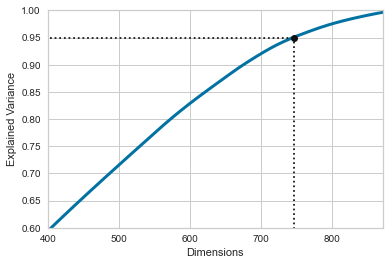

In [46]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([400, 871, 0.6, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)

In [47]:
pca = PCA(n_components=0.95)
cluster_data_prepared_pca = pca.fit_transform(cluster_data_prepared)
cluster_main_test_pca = pca.transform(cluster_main_test)

In [48]:
cluster_data_prepared_pca = pd.DataFrame(cluster_data_prepared_pca)
cluster_main_test_pca = pd.DataFrame(cluster_main_test_pca)

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:300%;text-align:center;border-radius:10px 10px;">Feature Clustering</p>

>上記のPCA(次元削減)によって必要である可能性を内包した特徴量を削除してしまっている可能性があるが、次数を下げたデータに対してクラスタリングを行い特徴量として追加する事によってよりモデルがパターンを認識できるようにFeatureClusteringを行う。

- 以下では自動化されたElbowScoreを使用しているが、自作するのであればInertiaScore, SilhouetteScoreを実装する。

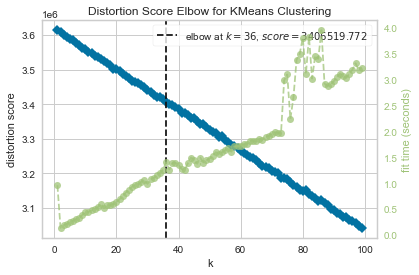

In [49]:
model = KMeans(init="k-means++", n_init=10)
visualizer = KElbowVisualizer(model, k=(1, 100))
visualizer.fit(cluster_data_prepared_pca)
visualizer.show();

In [50]:
#spect_1_cluster_data = SpectralClustering(n_clusters=visualizer.elbow_value_).fit_predict(cluster_data_prepared_pca)# visualizer.elbow_value_
#spect_1_cluster_test = SpectralClustering(n_clusters=visualizer.elbow_value_).fit_predict(cluster_main_test_pca)# visualizer.elbow_value_

In [51]:
spect_cluster_data = KMeans(n_clusters=visualizer.elbow_value_).fit_predict(cluster_data_prepared_pca)
spect_cluster_test = KMeans(n_clusters=visualizer.elbow_value_).fit_predict(cluster_main_test_pca)

>以下の特徴量クラスターを代入するのは加工後のデータでもよい。それは実験的に行う事でもよい。
>
>以下はPCAを前提としたデータに代入し再度Pipelineで変換する。

In [52]:
X['Cluster'] = spect_cluster_data

In [53]:
X.iloc[:, :9].head(10).style.background_gradient(cmap='mako_r', text_color_threshold=0.02)

,Pclass,Age,Parch,Ticket,Fare,Embarked,FamilySize,Sex_female,Sex_male
0,3,22,0,2,7,S,2,0,1
1,1,38,0,1,71,C,2,1,0
2,3,26,0,3,8,S,1,1,0
3,1,35,0,1,53,S,2,1,0
4,3,35,0,3,8,S,1,0,1
5,3,29,0,3,8,Q,1,0,1
6,1,54,0,1,52,S,1,0,1
7,3,2,1,3,21,S,5,0,1
8,3,27,2,3,11,S,3,1,0
9,2,14,0,2,30,C,2,1,0


In [54]:
test['Cluster'] = spect_cluster_test

In [55]:
test.iloc[:, :9].head(10).style.background_gradient(cmap='mako_r', text_color_threshold=0.02)

,Pclass,Age,Parch,Ticket,Fare,Embarked,FamilySize,Sex_female,Sex_male
891,3,34,0,3,8,Q,1,0,1
892,3,47,0,3,7,S,2,1,0
893,2,62,0,2,10,Q,1,0,1
894,3,27,0,3,9,S,1,0,1
895,3,22,1,3,12,S,3,1,0
896,3,14,0,7,9,S,1,0,1
897,3,30,0,3,8,Q,1,1,0
898,2,26,1,2,29,S,3,0,1
899,3,18,0,2,7,C,1,1,0
900,3,21,0,4,24,S,3,0,1


In [56]:
#X['cut_bin'] = pd.cut(X["Cluster"], 
#                      bins=np.round(np.log(len(X['Cluster']))).astype(int),  # Sturgess Formula : k=log2N+1 
#                      labels=[1, 2, 3, 4, 5, 6, 7], precision=2) # 0~7labels=[1, 2, 3, 4, 5, 6, 7]

In [57]:
#test['cut_bin'] = pd.cut(test["Cluster"], 
#                      bins=np.round(np.log(len(X['Cluster']))).astype(int),  # Sturgess Formula : k=log2N+1 
#                      labels=[1, 2, 3, 4, 5, 6, 7], precision=2) # 0~7labels=[1, 2, 3, 4, 5, 6, 7]

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:300%;text-align:center;border-radius:10px 10px;">Final Transform</p>

In [58]:
data_prepared = cluster_test_pipeline.fit_transform(X)

In [59]:
cluster_main_test = cluster_test_pipeline.transform(test)

In [60]:
X_train, X_val, y_train, y_val = train_test_split(data_prepared, data_labels, test_size=0.25, stratify=data_labels)

-----
<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:300%;text-align:center;border-radius:10px 10px;">Model</p>

## 分類問題
- 一般に、分類問題は、何らかの順序で<<条件付き確率を計算する>>事に帰着する
- <<条件付き確率>>を計算するために使う物は<<ベイズの定理>>
- ベイズの定理は、<<依存関係の順序を逆転>>させる$$P(B|A)=\frac{P(A|B)P(B)}{P(A)} $$
- 確率の計算は、方向を逆転させると簡単になることが多い$$P(B|A)=\frac{(1・8/36)}{(27/36)}=\frac{8}{27}$$
### 条件付き確率
- ２つの事象に相関があるとき、両者の間には数値的依存関係があり、計算が難しい。
- Bが起こる条件のもとでAが起こる条件付き確率P(A｜B)$$P(A|B)=\frac{P(A∩B)}{P(B)}$$

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;">GridSearch RandomizedSearch</p>

- グリッドサーチからおおまかな範囲を絞り込み、ランダムサーチ更に詳細な値を把握し、モデルのハイパーパラメータを取得する。

-----
<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;">Best Score Model</p>

### **GradientBoosting** 

- [ブースティングアルゴリズム](https://www.stat.berkeley.edu/~breiman/arcing-the-edge.pdf)
    - ブースティングアルゴリズムとは、複数の弱学習器を結合して強学習器を作れるあらゆるアンサンブルメソッドの事を言う。
- アンサンブルに前の予測器を改善した予測器を逐次加え、改善予測器は前の予測器の残差(residual error)に適合させる。
- 決定木の成長を制御するハイパーパラメータ
    - max_depth , min_samples_leaf , min_weight_fraction_leaf, min_impurity_decrease, min_samples_split ...
- アンサンブル訓練の調整をするハイパーパラメータ
    - n_estimators
- 個々の木の影響力の調整をするハイパーパラメータ
    - learning_rate
        - 低い値に設定する事によって、訓練セットへの適合のためにアンサンブルに多くの決定木を追加しなければならなくなる。
        - 低い値に設定する事で、通常は予測の汎化性能が上がり、これは収縮(shrinkage)という正則化のテクニックになる。
- 確率的勾配ブースティングの設定
    - subsample
        - ハイパーパラメータを設定する事によって無作為に選択された指定%の訓練インスタンスを使用して個々の決定木を訓練する
        - このテクニックはバイアスを少し上げた分、分散を下げる効果を発生させる。
- コスト関数の指定
    - loss
        - デフォルトではdevianceが使用される
        - exponentialとする事によってAdaBoostとする事が可能
        
- 仮設ブースティングアルゴリズムの説明をする為にエイダブーストを基礎ブースティングアルゴリズムとして説明する。この理由は勾配ブースティングがエイダの発展的なアルゴリズムである為、基礎を理解しなければならない。

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px 10px;">Ada Boost</p>

1. 個々のインスタンスにかけられた重み、$w^{(i)}$は初期の状態で $\frac{1}{m}$ に設定されている。最初の予測器を訓練した時、その予測器の訓練セットに対する重み付き誤り率$r_{1}$が計算される。
    - j番目の予測器の誤り率 $$r_{j} = \frac{\displaystyle \sum_{\substack{i=1\\\hat{y}^{(i)}_{j}  \neq y^{(i)}}}^m w^{(i)}}{\displaystyle \sum_{i=1}^m w^{(i)}}$$
    - ここで$\hat{y}^{(i)}_{j}$は i番目のインスタンスに対する j番目の予測器の予測である
    - 次に予測器の重みが計算される。$$\alpha _{j} =  \eta \log  \frac{1- r_{j}}{r_{j}}$$
    - 予測器の重み$\alpha_{j}$の計算の内、$\eta$は学習率ハイパーパラメータであり、デフォルトは１に指定されている。(オリジナルアルゴリズムには学習率ハイパーパラメータはない)予測器の精度が上がれば上がる程、重みは高くなる。無作為な推測であれば、重みは0に近づく。予測が不正確であれば重みは負数となる
    - インスタンスの重み更新を行う、これは誤った分類であるインスタンスの重みを大きくする効果を持つ$$for\quad i =1,2,\ldots,m$$ $$w^{(i)}\leftarrow \begin{cases}w^{(i)} & \quad\text{if}\quad\hat{a}_i^{(i)}=y^{(i)}  \\w^{(i)}\exp( \alpha_j) & \quad\text{if}\quad\hat{a}_i^{(i)}  \neq y^{(i)}\end{cases} $$
    - これにより全てのインスタンスの重みが$\sum_{i=1}^m ｗ^{(i)}$によって割られる。そして更新された重みを使って新しい予測器を訓練し、これを繰り返し、予測器の数が指定数に達するか完全な予測器が見つかった時にアルゴリズムは反復を止める
    - エイダブーストの予測は、単純にすべての予測器の予測を計算し、予測器の重み$\alpha_j$を使って予測に重みを与え、重み付きの多数決で選択されたクラスを予測結果として返す。$$\hat{y}(x) = \newcommand{\argmax}{\mathop{\rm argmax}\limits}\argmax_{k} = \sum_{\substack{i=1\\\hat{y}_j(x)=k}}^N a_j $$ここでNは予測器の数
    - scikit-learnは実際にはSAMME(Stagewise additive modeling using a multiclass exponential loss function：マルチクラス指数損失関数を使ったステージ別加法モデリング)というマルチクラスバージョンのエイダブーストを使用している。
    - エイダブーストアンサンブルが訓練セットに過学習する場合には、推定器の数を減らすか、ベース推定器を強く正則化すればよい。
>
>
2. 個々の決定木の訓練については、CART(Classification and Regression Tree)を使用して訓練が行われている。
    - １つの特徴量$k$としきい値$t_k$を使用して訓練セットを２つのサブセットに分割される、この$k$,$t_k$は最も純粋なサブセットを作り出す$(k,t_k)$のペアを探すという方法で選択される。
    - アルゴリズムが最小化しようとするコスト関数(分類用)$$J(k,t_k)=\frac{m_{\text left}}{m}G_{left} +  \frac{m_{right}}{m}G_{right}$$$$\text{Here}\begin{cases} G_\text{left/right} \quad Impurity \quad of \quad left \quad and \quad right \quad subsets \\ m_\text{left/right} \quad Number\quad of \quad instances \quad of \quad the \quad left \quad and \quad right \quad subsets\end{cases}$$
    - 深さの上限(max_depth)に達するか、不純度を下げる分割方法が見つからなければ再帰を中止する。停止条件としてのハイパーパラメータは
        - $\text{min_sumples_split, min_samples_leaf, min_weight_fraction_lead, max_leaf_nodes}$
    - CARTアルゴリズムは**GreedyAlgorithm**であり、トップレベルで最適な分割位置をどん欲に探し、核レベルで同じプロセスを繰り返す。不純度が最低になるかどうかはチェックしていない。このようなどん欲なアルゴリズムはまずまずよい解を生み出す事が多いが、最適な解を生み出す事は保証されていない。
    - **最適な木をみつけるという問題**は、***NP完全(NP-Complete)問題**であるという事が分かっている。計算量は$\text{O(exp(m))}$なので、ごく小規模な訓練セットでも、手に負えなくなる。まずまずよい解で終了しておかなければならない理由でもある。
    - Pは多項式時間で解決できる問題。NPは多項式時間で解を検証できる問題の集合。***NP困難問題***は、NP問題から多項式時間還元可能な問題である。***NP完全問題***は、NPでありNP困難問題である。P＝NPかどうかは、数学の重要な未解決問題で、$\text{P}\neq\text{NP}$なら、NP完全問題には多項式アルゴリズムはみつからないことになる、これは量子コンピュータで解決できるであろう問題でもある。
    - デフォルトではジニ不純度(GINI impurity)が使用されるが、criterionハイパーパラメータをentropyにする事によって不純度の指標としてエントロピー(entropy)が使用可能。
    - ***エントロピー***$$H_i = -\sum_{\substack{k=1\\ p_{i,k}k\neq0}}^n p_{i,k}\log_2(p_i,k) $$ジニ係数$$G_i = 1- \sum_{k=1}^n p_{i,k^2} $$
    - ジニ不純度とエントロピーのどちらをつかうべきなのかという問題では、殆どの場合どちらを使っても大差はない。

>XGBootが最近のMLにおいての最適解になっている場合が多いが、ここでは試験的にしか使用していない。Other Modelを参照

In [61]:
#gb_model = GradientBoostingClassifier()
#gb_param_grid = {'learning_rate':[0.1, 0.01, 0.001], 'max_depth':[5, 10], 'n_estimators':[10, 100, 200, 300]}
#gb_model.get_params().keys()

In [62]:
#gb_s_model = GridSearchCV(gb_model, gb_param_grid, cv=10, scoring='accuracy')
#gb_s_model.fit(X_train, y_train)

In [63]:
#gb_s_model.best_params_
#{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100} samples=10000
gb_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100) # warm_start=True
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5)

In [64]:
#gb = gb_s_model.best_estimator_
y_pred_gb = gb_model.predict(X_val)

Precision : 0.9041095890410958 / Recall : 0.7674418604651163
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       137
         1.0       0.90      0.77      0.83        86

    accuracy                           0.88       223
   macro avg       0.89      0.86      0.87       223
weighted avg       0.88      0.88      0.88       223



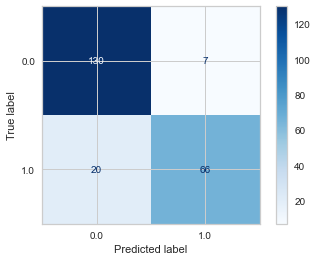

In [65]:
print('Precision : {} / Recall : {}'.format(precision_score(y_val, y_pred_gb), recall_score(y_val, y_pred_gb)))
print(classification_report(y_val, y_pred_gb))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred_gb), display_labels=gb_model.classes_)
disp.plot(cmap='Blues');

In [66]:
main_pred_gb = gb_model.predict(cluster_main_test)

In [67]:
a = pd.DataFrame({'PassengerId': np.arange(892, 1310, 1), 'Survived': main_pred_gb.astype(int)}).to_csv('submission_test.csv', index=0) # 0.80143

In [68]:
kfold_1 =StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [69]:
y_score = cross_val_predict(gb_model, X_train, y_train, cv=kfold_1, method='decision_function')

In [70]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precision[:-1], "b--", label="Precision") # [:-1]
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") # [:-1]
    plt.legend()

In [71]:
precision, recall, thresholds = precision_recall_curve(y_train, y_score)

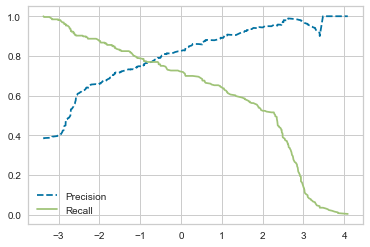

In [72]:
plot_precision_recall_vs_threshold(precision, recall, thresholds)

In [73]:
threshold_90_precision = thresholds[np.argmax(precision >= 0.80)] # 0.85 # 0.80
threshold_90_precision

-0.477359488040742

In [74]:
y_train_pred_90 = (y_score >= threshold_90_precision)

In [75]:
y_train_pred_90.shape # y_train

(668,)

In [76]:
gb_model.fit(X_train, y_train_pred_90)

GradientBoostingClassifier(max_depth=5)

In [77]:
y_pred_90_gb = gb_model.predict(X_val)

Precision : 0.8955223880597015 / Recall : 0.6976744186046512
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89       137
         1.0       0.90      0.70      0.78        86

    accuracy                           0.85       223
   macro avg       0.86      0.82      0.84       223
weighted avg       0.86      0.85      0.85       223



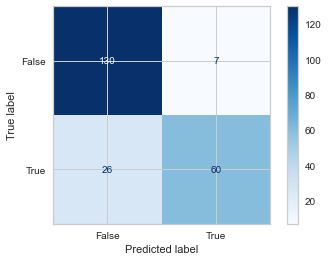

In [78]:
print('Precision : {} / Recall : {}'.format(precision_score(y_val, y_pred_90_gb), recall_score(y_val, y_pred_90_gb)))
print(classification_report(y_val, y_pred_90_gb))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred_90_gb), display_labels=gb_model.classes_)
disp.plot(cmap='Blues');

In [79]:
main_pred_90_gb = gb_model.predict(cluster_main_test)

In [80]:
pd.DataFrame({'PassengerId': np.arange(892, 1310, 1), 'Survived': main_pred_90_gb.astype(int)}).to_csv('submission_best.csv', index=0)

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;">early stopping</p>

- モデルを正則化する方法の一つ
- 確率的勾配降下法やミニバッチ勾配降下法では、バッチ勾配降下法のように曲線が滑らかにならず、局所的最小値に捕まる恐れがある。その為、検証誤差がしばらくの間最小値よりも上がり続ける場合、最後の最小値へロールバックする構文を構成すればよい。
- 早期打ち切りは、ブースティングアルゴリズムにおいて決定木の最適数見つける場合にも使用可能。

In [81]:
errors = [precision_score(y_val, y_pred)
          for y_pred in gb_model.staged_predict(X_val)]

In [82]:
bst_n_estimators = np.argmax(errors) + 1

In [83]:
bst_n_estimators

3

In [84]:
gb_best = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=bst_n_estimators)

In [85]:
gb_best.fit(X_train, y_train_pred_90)

GradientBoostingClassifier(max_depth=5, n_estimators=3)

In [86]:
y_pred_90_gb_best = gb_model.predict(X_val)

Precision : 0.8955223880597015 / Recall : 0.6976744186046512
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89       137
         1.0       0.90      0.70      0.78        86

    accuracy                           0.85       223
   macro avg       0.86      0.82      0.84       223
weighted avg       0.86      0.85      0.85       223



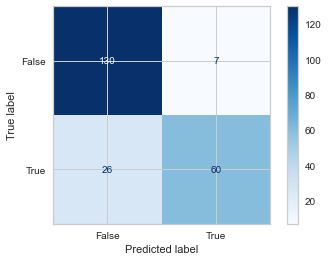

In [87]:
print('Precision : {} / Recall : {}'.format(precision_score(y_val, y_pred_90_gb_best), recall_score(y_val, y_pred_90_gb_best)))
print(classification_report(y_val, y_pred_90_gb_best))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred_90_gb_best), display_labels=gb_best.classes_)
disp.plot(cmap='Blues');

In [88]:
main_pred_90_gb_best = gb_best.predict(cluster_main_test)

In [89]:
pd.DataFrame({'PassengerId': np.arange(892, 1310, 1),
              'Survived': pd.DataFrame(main_pred_90_gb_best).replace({False: 0, True :1}).to_numpy().T[0]}).to_csv('submission_01.csv', index=0)

In [90]:
param_rand = {'learning_rate': reciprocal(0.001, 1), 
              'max_depth': randint(low=3, high=10)}

In [91]:
gb_best_rd = GradientBoostingClassifier(subsample=0.25, n_estimators=bst_n_estimators, warm_start=True)

In [92]:
rnd_search = RandomizedSearchCV(gb_best_rd, param_rand, n_iter=10, cv=kfold_1, scoring='f1')

In [93]:
rnd_search.fit(X_train, y_train_pred_90)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=GradientBoostingClassifier(n_estimators=3,
                                                        subsample=0.25,
                                                        warm_start=True),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E58C7AC2B0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E58C7A5E50>},
                   scoring='f1')

In [94]:
gb_best_p = GradientBoostingClassifier(learning_rate=0.12727932524008223, max_depth=3, subsample=0.25, n_estimators=bst_n_estimators, warm_start=True)

In [95]:
gb_best_p.fit(X_train, y_train_pred_90)

GradientBoostingClassifier(learning_rate=0.12727932524008223, n_estimators=3,
                           subsample=0.25, warm_start=True)

In [96]:
y_pred_90_gb_best_rnd = gb_best_p.predict(X_val)

Precision : 0.875 / Recall : 0.6511627906976745
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87       137
         1.0       0.88      0.65      0.75        86

    accuracy                           0.83       223
   macro avg       0.84      0.80      0.81       223
weighted avg       0.84      0.83      0.82       223



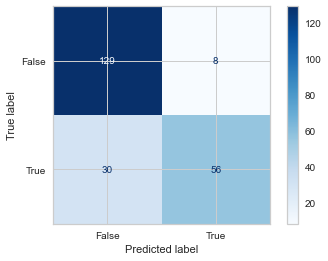

In [97]:
print('Precision : {} / Recall : {}'.format(precision_score(y_val, y_pred_90_gb_best_rnd), recall_score(y_val, y_pred_90_gb_best_rnd)))
print(classification_report(y_val, y_pred_90_gb_best_rnd))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred_90_gb_best_rnd), display_labels=gb_best_p.classes_)
disp.plot(cmap='Blues');

In [98]:
main_pred_90_gb_best_rnd = gb_best.predict(cluster_main_test)

In [99]:
a = pd.DataFrame({'PassengerId': np.arange(892, 1310, 1),
                  'Survived': pd.DataFrame(main_pred_90_gb_best_rnd).replace({False: 0, True :1}).to_numpy().T[0]}).to_csv('submission_02.csv', index=0)

In [100]:
#pd.DataFrame(main_pred_90_gb_best_rnd).replace({False: 0, True :1}).to_numpy().T[0]

In [101]:
precision_score(y_train, y_train_pred_90)

0.8

In [102]:
recall_score(y_train, y_train_pred_90)

0.75

In [103]:
fpr, tpr, thresholds_r = roc_curve(y_train_pred_90, y_score)

In [104]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

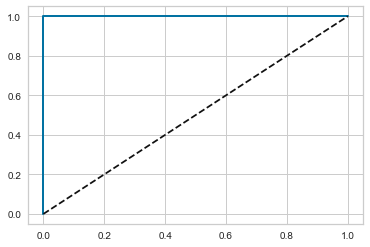

In [105]:
plot_roc_curve(fpr, tpr)

In [106]:
roc_auc_score(y_train_pred_90, y_score)

1.0

In [107]:
y_train_pred = cross_val_predict(gb_model, X_train, y_train_pred_90, cv=3)

In [108]:
cl_a, cl_b = 0, 1

In [109]:
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

<p style="background-color:#000000;font-family:Georgia;color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;">Other Models</p>

### **AdaBoost**

In [110]:
#ada_model = AdaBoostClassifier() # estimators=DecisionTreeClassifier(max_depth=1) : Default
#ada_param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 100, 200, 300]}
#ada_model.get_params().keys()

In [111]:
#ada_s_model = GridSearchCV(ada_model, ada_param_grid, cv=10, scoring='accuracy')
#ada_s_model.fit(X_train, y_train)

In [112]:
#ada_s_model.best_params_
# {'learning_rate': 1, 'n_estimators': 100} samples=10000

#ada_model = AdaBoostClassifier(learning_rate=1, n_estimators=100) 
#ada_model.fit(X_train, y_train)
ada_model = AdaBoostClassifier(learning_rate=1, n_estimators=100) 
ada_model.fit(X_train, y_train_pred_90)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [113]:
#ada = ada_s_model.best_estimator_
y_pred_ada = ada_model.predict(X_val)

Precision : 0.8985507246376812 / Recall : 0.7209302325581395
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       137
         1.0       0.90      0.72      0.80        86

    accuracy                           0.86       223
   macro avg       0.87      0.83      0.85       223
weighted avg       0.87      0.86      0.86       223



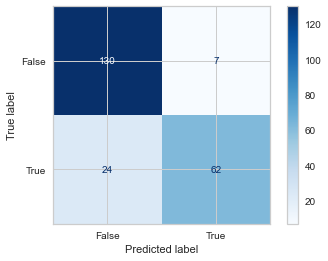

In [114]:
print('Precision : {} / Recall : {}'.format(precision_score(y_val, y_pred_ada), recall_score(y_val, y_pred_ada)))
print(classification_report(y_val, y_pred_ada))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred_ada), display_labels=ada_model.classes_)
disp.plot(cmap='Blues');

In [115]:
prediction_ada = ada_model.predict(cluster_main_test)

In [116]:
pd.DataFrame({'PassengerId': np.arange(892, 1310, 1), 'Survived': prediction_ada.astype(int)}).to_csv('submission_Ada_01.csv', index=0)

### RandomForestClassifier

In [117]:
#rand_model = RandomForestClassifier()
#rnd_param_grid = {'n_estimators': [40, 50, 55], 'max_depth': [90, 100, 150], 'max_samples': [1200, 1500, 1600]}
#rand_model.get_params().keys()

In [118]:
#rnd_model = GridSearchCV(rand_model, rnd_param_grid, cv=10, scoring='accuracy')
#rnd_model.fit(X_train, y_train)

In [119]:
#rnd_model.best_params_
#{'max_depth': 10, 'max_samples': 300, 'n_estimators': 100} sample=10000

In [120]:
#rand_model = rnd_model.best_estimator_
#rand_model = RandomForestClassifier(max_depth=90, max_samples=300, n_estimators=40)
#rand_model.fit(X_train, y_train)
#y_pred_rnd = rand_model.predict(X_val)

rand_model = RandomForestClassifier(max_depth=90, max_samples=300, n_estimators=40)
rand_model.fit(X_train, y_train_pred_90)
y_pred_rnd = rand_model.predict(X_val)

Precision : 0.8888888888888888 / Recall : 0.7441860465116279
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.90       137
         1.0       0.89      0.74      0.81        86

    accuracy                           0.87       223
   macro avg       0.87      0.84      0.85       223
weighted avg       0.87      0.87      0.86       223



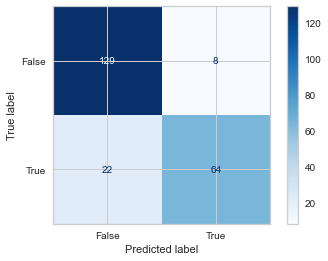

In [121]:
print('Precision : {} / Recall : {}'.format(precision_score(y_val, y_pred_rnd), recall_score(y_val, y_pred_rnd)))
print(classification_report(y_val, y_pred_rnd))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred_rnd), display_labels=rand_model.classes_)
disp.plot(cmap='Blues');

In [122]:
prediction_rand = rand_model.predict(cluster_main_test)

In [123]:
rand_model.fit(X_train, y_train_pred_90)

RandomForestClassifier(max_depth=90, max_samples=300, n_estimators=40)

In [124]:
y_pred_rnd_90 = rand_model.predict(X_val)

Precision : 0.8783783783783784 / Recall : 0.7558139534883721
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90       137
         1.0       0.88      0.76      0.81        86

    accuracy                           0.87       223
   macro avg       0.87      0.85      0.85       223
weighted avg       0.87      0.87      0.86       223



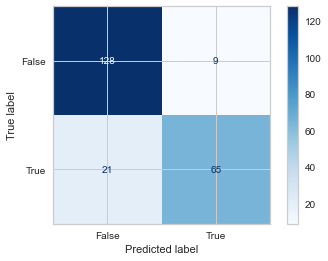

In [125]:
print('Precision : {} / Recall : {}'.format(precision_score(y_val, y_pred_rnd_90), recall_score(y_val, y_pred_rnd_90)))
print(classification_report(y_val, y_pred_rnd_90))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred_rnd_90), display_labels=rand_model.classes_)
disp.plot(cmap='Blues');

In [126]:
pd.DataFrame({'PassengerId': np.arange(892, 1310, 1), 'Survived': prediction_rand.astype(int)}).to_csv('submission_rand_01.csv', index=0)

### ExtraTreeClassifier

In [127]:
#ex_model = ExtraTreesClassifier()
#ex_grid_param = {'n_estimators': [10, 90, 100, 110], 'max_depth': [8, 9, 11, 14, 15, 30], 'max_samples': [90, 100, 260, 270]}

In [128]:
#ext_model = GridSearchCV(ex_model, ex_grid_param, cv=10, scoring='accuracy')
#ext_model.fit(X_train, y_train)

In [129]:
#ext_model.best_params_
# {'max_depth': 14, 'max_samples': 270, 'n_estimators': 110}
# {'max_depth': 30, 'max_samples': 270, 'n_estimators': 90} sample=10000
# {'max_depth': 30, 'max_samples': 270, 'n_estimators': 110}

In [130]:
#ext = ext_model.best_estimator_
#ex_model = ExtraTreesClassifier(max_depth=30, max_samples=270, n_estimators=110)
#ex_model.fit(X_train, y_train)
#y_pred_ext = ex_model.predict(X_val)

ex_model = ExtraTreesClassifier(max_depth=30, max_samples=270, n_estimators=110)
ex_model.fit(X_train, y_train_pred_90)
y_pred_ext = ex_model.predict(X_val)

Precision : 0.8904109589041096 / Recall : 0.7558139534883721
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       137
         1.0       0.89      0.76      0.82        86

    accuracy                           0.87       223
   macro avg       0.88      0.85      0.86       223
weighted avg       0.87      0.87      0.87       223



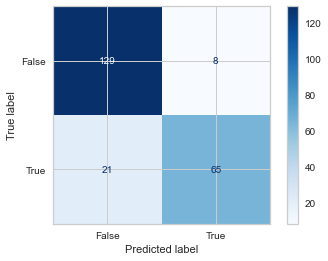

In [131]:
print('Precision : {} / Recall : {}'.format(precision_score(y_val, y_pred_ext), recall_score(y_val, y_pred_ext)))
print(classification_report(y_val, y_pred_ext))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred_ext), display_labels=ex_model.classes_)
disp.plot(cmap='Blues');

In [132]:
prediction_ex = ex_model.predict(cluster_main_test)

In [133]:
# BestScore81%
pd.DataFrame({'PassengerId': np.arange(892, 1310, 1), 'Survived': prediction_ex.astype(int)}).to_csv('submission_ext_01.csv', index=0)

### SVM

In [134]:
#svm_model=SVC(kernel='rbf', probability=True) # kernel='rbf', probability=True
#tuned_param = {'gamma': [0.005,0.01,0.05,0.1,1],'C':[0.1,1,5,10]}

In [135]:
#svc_model = GridSearchCV(svm_model, tuned_param, cv=10, scoring='accuracy')
#svc_model.fit(X_train, y_train)

In [136]:
#svc_model.best_params_

In [137]:
#svc = svc_model.best_estimator_
#svm_model=SVC(kernel='rbf', probability=True, C=5, gamma=1)
#svm_model.fit(X_train, y_train)
#y_pred = svm_model.predict(X_val)

In [138]:
#print('Precision : {} / Recall : {}'.format(precision_score(y_val, y_pred), recall_score(y_val, y_pred)))
#print(classification_report(y_val, y_pred))
#disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred), display_labels=svc.classes_)
#disp.plot(cmap='Blues');

### XGBoost

In [139]:
#xgb_boost = XGBClassifier(use_label_encoder=False, eval_metric='auc')
#xgb_boost.fit(X_train, y_train)
#y_pred_xgb = xgb_boost.predict(X_val)

xgb_boost = XGBClassifier(use_label_encoder=False, eval_metric='auc')
xgb_boost.fit(X_train, y_train_pred_90)
y_pred_xgb = xgb_boost.predict(X_val)

Precision : 0.9 / Recall : 0.7325581395348837
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       137
         1.0       0.90      0.73      0.81        86

    accuracy                           0.87       223
   macro avg       0.87      0.84      0.85       223
weighted avg       0.87      0.87      0.86       223



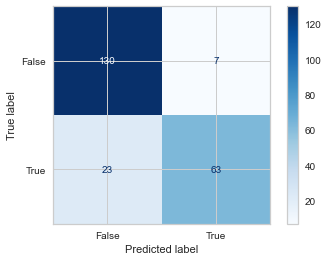

In [140]:
print('Precision : {} / Recall : {}'.format(precision_score(y_val, y_pred_xgb), recall_score(y_val, y_pred_xgb)))
print(classification_report(y_val, y_pred_xgb))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred_xgb), display_labels=xgb_boost.classes_)
disp.plot(cmap='Blues');

In [141]:
prediction_xgb = xgb_boost.predict(cluster_main_test)

In [142]:
pd.DataFrame({'PassengerId': np.arange(892, 1310, 1), 'Survived': prediction_xgb.astype(int)}).to_csv('submission_xgb_01.csv', index=0)

In [143]:
xgb_boost = XGBClassifier(use_label_encoder=False, eval_metric='auc', learning_rate=0.01, max_depth=3, n_estimators=200)
xgb_boost.fit(X_train, y_train_pred_90)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [144]:
prediction_xgb_test = xgb_boost.predict(cluster_main_test)

In [145]:
pd.DataFrame({'PassengerId': np.arange(892, 1310, 1), 'Survived': prediction_xgb_test}).to_csv('submission_xgb_02.csv', index=0)

### VotingClassifier

In [146]:
rf = RandomForestClassifier()
logr = LogisticRegression()
xgb = XGBClassifier(eval_metric='mlogloss')
dtree= DecisionTreeClassifier(random_state = 0)
ex_model = ExtraTreesClassifier()
gb_model = GradientBoostingClassifier()
ada_model = AdaBoostClassifier(learning_rate=1, n_estimators=100) 

knn = KNeighborsClassifier()
svc = SVC(probability=True)
ridge_c = RidgeClassifier()

In [147]:
kfold =StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [148]:
def score_model_class(model, params ,scoring = "f1_macro"):
    
    model = GridSearchCV(model, param_grid=params, scoring=scoring, cv=kfold)
    
    model.fit(X_train, y_train_pred_90) # y_train_pred_90
    y_pred = model.predict(X_val)
    
    print ("Model and params: ", model.best_estimator_, model.best_params_) 
    print("\n")
    print("Train f1 score: ", model.best_score_)
    print("test f1_score: ",f1_score(y_val, y_pred))
    print("\n")
    print("Test Report:")
    print(classification_report(y_val, y_pred))
    return model

In [149]:
ridge_params = {"max_iter": [120, 200,300], "alpha":[0.1,0.8, 1,1.5, 2,3]}
logr_params = {"solver":["liblinear","saga", "lbfgs", "newton-cg"],
    "penalty": ["l2","l1", "elasticnet", "none"],
    "C": [0.01,0.5,1,3,4],
    "max_iter": [4000]
}
xgb_params={'learning_rate': [0.05,0.01,0.1, 1], 
           # "subsample": [0.5, 0.7, 1.0],
            'max_depth': [2, 3, 5, 7],
            #"gamma" : [3,4,5,6] ,             
            'n_estimators': [150, 200, 300, 500]
           }
forest_params = {     
    "max_depth" : [10,20,30,40],       
    "n_estimators" : [300,350,400,410,420,440],
    "max_features" :["auto", "log2", None]
}
tree_params = { "max_depth" : [8,10,20,30],       
    "max_features" :["auto", "log2", None]}

knn_params = {"n_neighbors" : [2,3,5] , "metric" :["euclidean", "manhattan", "minkowski"], "weights" :["uniform", "distance"]}
svc_params = {"kernel" : ["linear", "poly", "rbf", "sigmoid"], "C" : [ 0.001, 0.1, 1, 2, 3], "gamma":["scale", "auto"]}

In [150]:
ex_m = score_model_class(ex_model, {'max_depth': [30], 'max_samples': [270], 'n_estimators': [110]})

Model and params:  ExtraTreesClassifier(max_depth=30, max_samples=270, n_estimators=110) {'max_depth': 30, 'max_samples': 270, 'n_estimators': 110}


Train f1 score:  0.9394326088311103
test f1_score:  0.8176100628930817


Test Report:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       137
         1.0       0.89      0.76      0.82        86

    accuracy                           0.87       223
   macro avg       0.88      0.85      0.86       223
weighted avg       0.87      0.87      0.87       223



In [151]:
ada_m = score_model_class(ada_model, {'learning_rate': [1], 'n_estimators': [100]}) 

Model and params:  AdaBoostClassifier(learning_rate=1, n_estimators=100) {'learning_rate': 1, 'n_estimators': 100}


Train f1 score:  0.9425615310821508
test f1_score:  0.7999999999999999


Test Report:
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       137
         1.0       0.90      0.72      0.80        86

    accuracy                           0.86       223
   macro avg       0.87      0.83      0.85       223
weighted avg       0.87      0.86      0.86       223



In [152]:
#ridge_m = score_model_class (ridge_c, ridge_params)
ridge_m = score_model_class(ridge_c, {'alpha': [1.2, 1.5, 2], 'max_iter': [2]})

Model and params:  RidgeClassifier(alpha=1.2, max_iter=2) {'alpha': 1.2, 'max_iter': 2}


Train f1 score:  0.8323324914076841
test f1_score:  0.7066666666666667


Test Report:
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85       137
         1.0       0.83      0.62      0.71        86

    accuracy                           0.80       223
   macro avg       0.81      0.77      0.78       223
weighted avg       0.81      0.80      0.80       223



In [153]:
#logr_m = score_model_class(logr, logr_params)
ex_m = score_model_class(ex_model, {'max_depth' : [30], 'max_samples' : [270], 'n_estimators': [110]})

Model and params:  ExtraTreesClassifier(max_depth=30, max_samples=270, n_estimators=110) {'max_depth': 30, 'max_samples': 270, 'n_estimators': 110}


Train f1 score:  0.9393867678357022
test f1_score:  0.8176100628930817


Test Report:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       137
         1.0       0.89      0.76      0.82        86

    accuracy                           0.87       223
   macro avg       0.88      0.85      0.86       223
weighted avg       0.87      0.87      0.87       223



In [154]:
#rf_m =random_forest = score_model_class(rf, forest_params)
rf_m = score_model_class(rf, {'max_depth': [90], 'max_samples': [300], 'n_estimators': [100]})

Model and params:  RandomForestClassifier(max_depth=90, max_samples=300) {'max_depth': 90, 'max_samples': 300, 'n_estimators': 100}


Train f1 score:  0.9394645975250582
test f1_score:  0.8227848101265824


Test Report:
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       137
         1.0       0.90      0.76      0.82        86

    accuracy                           0.87       223
   macro avg       0.88      0.85      0.86       223
weighted avg       0.88      0.87      0.87       223



In [155]:
#dtree_m = score_model_class(dtree, tree_params)
dtree_m = score_model_class(dtree, {'max_depth': [50], 'max_features': [60]})

Model and params:  DecisionTreeClassifier(max_depth=50, max_features=60, random_state=0) {'max_depth': 50, 'max_features': 60}


Train f1 score:  0.8421574650744763
test f1_score:  0.7770700636942676


Test Report:
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88       137
         1.0       0.86      0.71      0.78        86

    accuracy                           0.84       223
   macro avg       0.85      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



In [156]:
#xgb_m = score_model_class(xgb, xgb_params)
xgb_m = score_model_class(xgb, {'learning_rate': [0.01], 'max_depth': [3], 'n_estimators': [200]})

Model and params:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


Train f1 score:  0.9604311507478268
test f1_score:  0.7843137254901962


Test Report:
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89       137
         1.0       0.90      0.70      0.78        86

    accuracy 

In [157]:
#knn_m = score_model_class(knn, knn_params)
knn_m = score_model_class(knn, {'metric': ['manhattan'], 'n_neighbors': [5], 'weights': ['distance']})

Model and params:  KNeighborsClassifier(metric='manhattan', weights='distance') {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


Train f1 score:  0.48227873389956183
test f1_score:  0.12903225806451613


Test Report:
              precision    recall  f1-score   support

         0.0       0.63      0.99      0.77       137
         1.0       0.86      0.07      0.13        86

    accuracy                           0.64       223
   macro avg       0.74      0.53      0.45       223
weighted avg       0.72      0.64      0.52       223



In [158]:
#svc_m = score_model_class(svc, svc_params)
svc_m = score_model_class(svc, {'C': [2], 'gamma': ['scale'], 'kernel': ['sigmoid']})

Model and params:  SVC(C=2, kernel='sigmoid', probability=True) {'C': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}


Train f1 score:  0.8438327565381355
test f1_score:  0.7066666666666667


Test Report:
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85       137
         1.0       0.83      0.62      0.71        86

    accuracy                           0.80       223
   macro avg       0.81      0.77      0.78       223
weighted avg       0.81      0.80      0.80       223



In [159]:
gb_m = score_model_class(gb_model, {'learning_rate': [0.1], 'max_depth': [5], 'n_estimators': [100]})

Model and params:  GradientBoostingClassifier(max_depth=5) {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


Train f1 score:  0.9636412799864814
test f1_score:  0.7843137254901962


Test Report:
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89       137
         1.0       0.90      0.70      0.78        86

    accuracy                           0.85       223
   macro avg       0.86      0.82      0.84       223
weighted avg       0.86      0.85      0.85       223



In [160]:
vc = VotingClassifier([#("knn_m", knn_m), 
                       #("svc_m", svc_m),
                       ("xgb_m",xgb_m),
                       #("ridge_m", ridge_m),
                       #("dtree_m", dtree_m),
                       ("ex_m", ex_m),
                       ("rf_m", rf_m), 
                       ("gb_m", gb_m), ("ada_m", ada_m)],
                      voting = "soft")# hard

vc.fit(X_train,y_train)

VotingClassifier(estimators=[('xgb_m',
                              GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                                           estimator=XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   enable_categorical=False,
                                                                   eval_metric='mlogloss',
                                                                   gamma=None,
                                                                   gpu_id=None,
                                                                   importanc

In [161]:
print("training: ", vc.score(X_train,y_train))
print(classification_report(y_val,vc.predict(X_val)))

training:  0.9580838323353293
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       137
         1.0       0.90      0.77      0.83        86

    accuracy                           0.88       223
   macro avg       0.89      0.86      0.87       223
weighted avg       0.88      0.88      0.88       223



In [162]:
y_sub = vc.predict(cluster_main_test)
sub = pd.DataFrame({'PassengerId': test.index, 'Survived': y_sub})
sub["Survived"] = sub["Survived"].astype(int)

In [163]:
pd.DataFrame({'PassengerId': np.arange(892, 1310, 1), 'Survived': y_sub.astype(int)}).to_csv('submission_VT_01.csv', index=0)

# TensorFlow Keras WorkFlow Work in progress...